In [21]:
import datetime
import dateutil

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
font = {'size'   : 14}
matplotlib.rc('font', **font)

import numpy as np
import pandas as pd
from tqdm import tqdm

import tensorflow as tf

In [2]:
from tensorflow import keras

model = keras.models.load_model("Model_5_6_epoch10_constant_lr_time_240") #model needs to be generated in
                                                                          # recurrent_prediction.ipynb

2021-11-02 23:49:08.434461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.singularity.d/libs
2021-11-02 23:49:08.434485: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-02 23:49:08.434508: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (datascc): /proc/driver/nvidia/version does not exist
2021-11-02 23:49:08.434717: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#---copied from https://github.com/malhamid/LSTM/blob/main/LSTM.ipynb

def create_sequence(dataset, length):
    #already described in non_reccurent_analytics.ipynb 
    data_sequences = []
    for index in range(len(dataset) - length):
        data_sequences.append(dataset[index: index + length])
    return np.asarray(data_sequences)
#---

df=pd.read_pickle(f"cleaned_Month_2021_number_{5}_to_{6}.pkl")    # dataset needs to be generated under
                                                                  # data_cleaning.ipynb
train_idx=np.arange(int(0.8*len(df)))

mean  = df.iloc[train_idx].mean(axis=0) 
sigma = df.iloc[train_idx].std(axis=0)

sigma[sigma==0]=1

df

PINH9FD5L:rdSigmaYav  PINH9FD5L:rdFwhmY  \
datetime                                                                       
2021-05-11 19:00:01.150033120+02:00             45.477847         111.750536   
2021-05-11 19:00:01.391051360+02:00             45.501208         111.750536   
2021-05-11 19:00:01.629644020+02:00             45.483436         111.750536   
2021-05-11 19:00:01.901243220+02:00             45.470538         111.750536   
2021-05-11 19:00:02.137171390+02:00             45.478008         111.878031   
...                                                   ...                ...   
2021-05-30 18:59:59.994809520+02:00             45.618169         112.599220   
2021-05-30 19:00:00.240527750+02:00             45.613260         112.599220   
2021-05-30 19:00:00.480020450+02:00             45.629247         112.599220   
2021-05-30 19:00:00.742301640+02:00             45.629789         112.599220   
2021-05-30 19:00:00.986886130+02:00             45.741564         112.599220   

                                     WFGENC1S7G:rdVolt  WFGENC1S10G:rdVolt  \
datetime                                                                     
2021-05-11 19:00:01.150033120+02:00                1.4                0.55   
2021-05-11 19:00:01.391051360+02:00                1.4                0.55   
2021-05-11 19:00:01.629644020+02:00                1.4                0.55   
2021-05-11 19:00:01.901243220+02:00                1.4                0.55   
2021-05-11 19:00:02.137171390+02:00                1.4                0.55   
...                                                ...                 ...   
2021-05-30 18:59:59.994809520+02:00                1.4                2.00   
2021-05-30 19:00:00.240527750+02:00                1.4                2.00   
2021-05-30 19:00:00.480020450+02:00                1.4                2.00   
2021-05-30 19:00:00.742301640+02:00                1.4                2.00   
2021-05-30 19:00:00.986886130+02:00                1.4                2.00   

                                     WFGENC1S7G:setVolt  TOPUPCC:rdCur  \
datetime                                                                 
2021-05-11 19:00:01.150033120+02:00                 1.4     297.291114   
2021-05-11 19:00:01.391051360+02:00                 1.4     297.282307   
2021-05-11 19:00:01.629644020+02:00                 1.4     297.282307   
2021-05-11 19:00:01.901243220+02:00                 1.4     297.282307   
2021-05-11 19:00:02.137171390+02:00                 1.4     297.282307   
...                                                 ...            ...   
2021-05-30 18:59:59.994809520+02:00                 1.4     296.981985   
2021-05-30 19:00:00.240527750+02:00                 1.4     296.981985   
2021-05-30 19:00:00.480020450+02:00                 1.4     296.974113   
2021-05-30 19:00:00.742301640+02:00                 1.4     296.974113   
2021-05-30 19:00:00.986886130+02:00                 1.4     296.974113   

                                     U125ID2R:CIOC:rdbk0  U139ID6R:CIOC:rdbk0  \
datetime                                                                        
2021-05-11 19:00:01.150033120+02:00            99.998526             19.84397   
2021-05-11 19:00:01.391051360+02:00            99.998526             19.84397   
2021-05-11 19:00:01.629644020+02:00            99.998526             19.84397   
2021-05-11 19:00:01.901243220+02:00            99.998526             19.84397   
2021-05-11 19:00:02.137171390+02:00            99.998526             19.84397   
...                                                  ...                  ...   
2021-05-30 18:59:59.994809520+02:00            76.091494             19.84397   
2021-05-30 19:00:00.240527750+02:00            76.091494             19.84397   
2021-05-30 19:00:00.480020450+02:00            76.091494             19.84397   
2021-05-30 19:00:00.742301640+02:00            76.091494             19.84397   
2021-05-30 19:00:00.986886130+02:00           

In [6]:
columns=list(df.min(axis=0).index)[2:]     #parameter names

In [13]:
#create artificial data set
#first we will construct the timepoints

t0=datetime.datetime(2000,1,1)
t0=pd.Timestamp(t0,tz=dateutil.tz.tz.tzlocal())
t0+pd.Timedelta("250milli")

time_index_list=[t0+r*pd.Timedelta("250milli") for r in range(-240,490)]

In [14]:
min_list=list(df.min(axis=0))   #list of all minimum values for all parameters
max_list=list(df.max(axis=0))   #list of all maximum values for all parameters

min_240=np.array([[x for i in range(-240,490)] for x in min_list[2:]])    #numpy array with all minimum

x_df=pd.DataFrame(min_240.T,           #make the numpy array to a dataframe         
                   columns=columns)


/tmp/ipykernel_64152/4025559952.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,7))


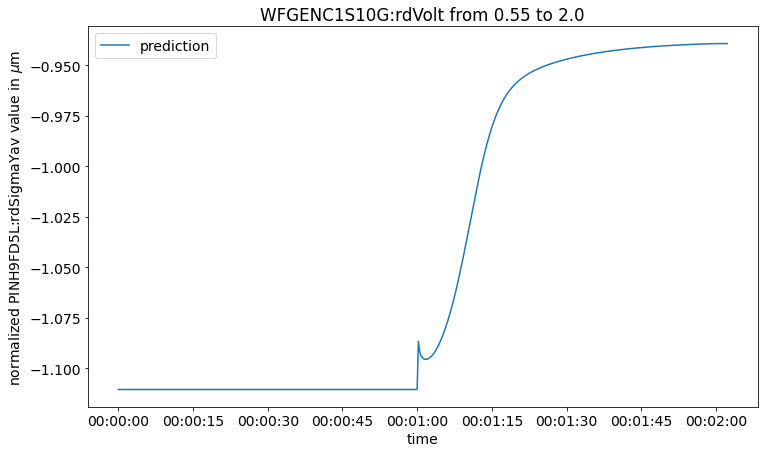

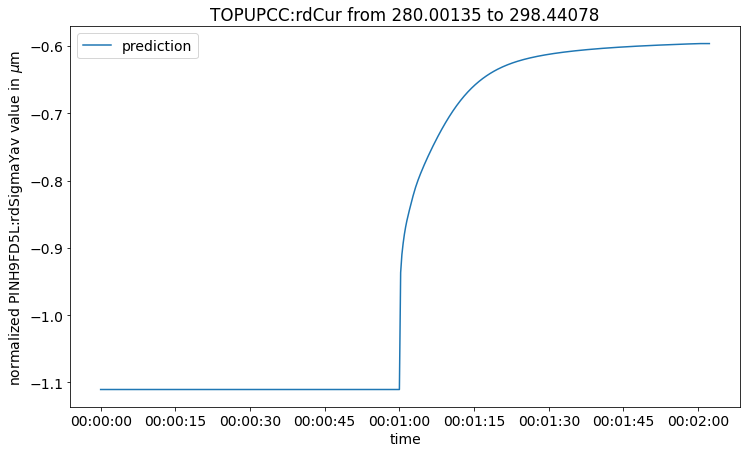

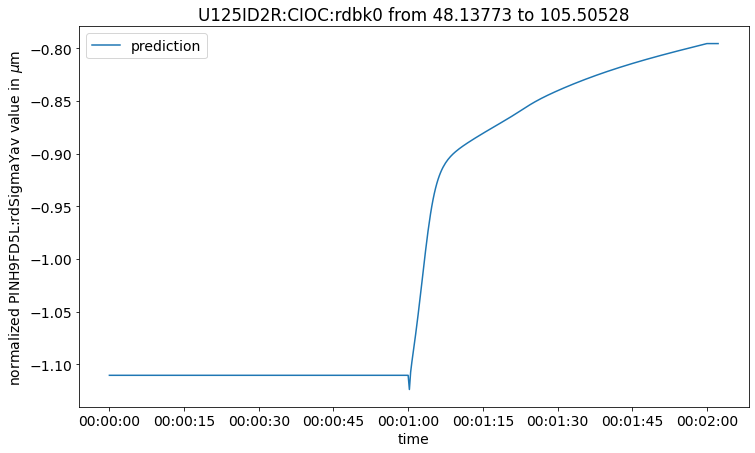

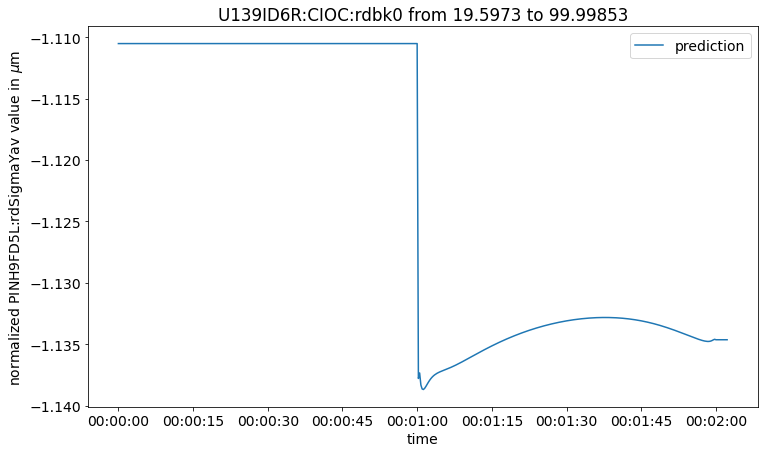

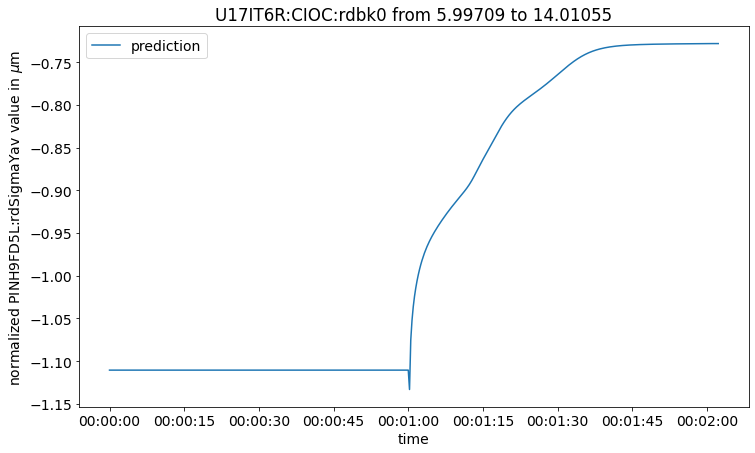

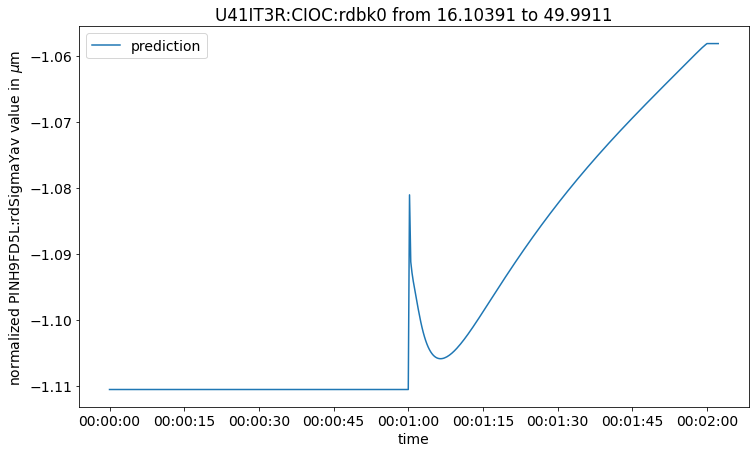

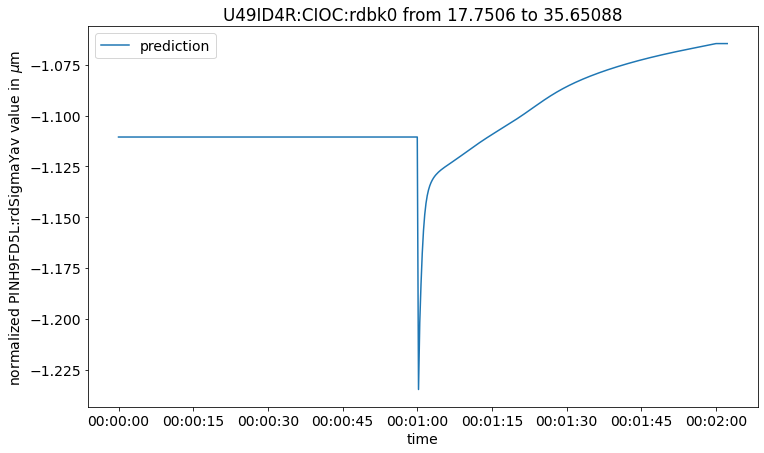

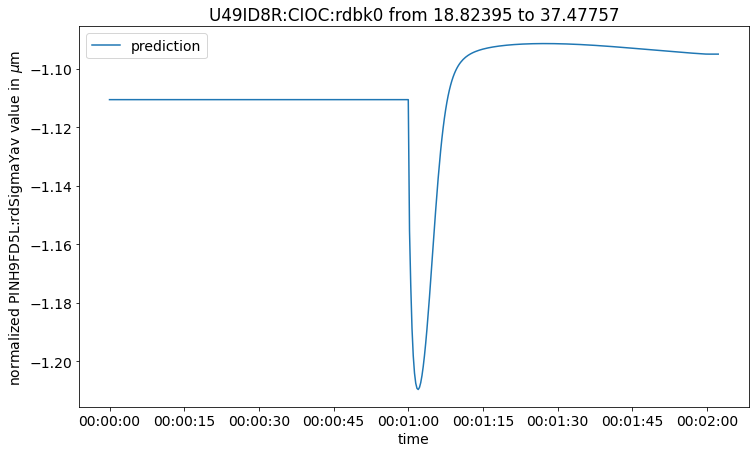

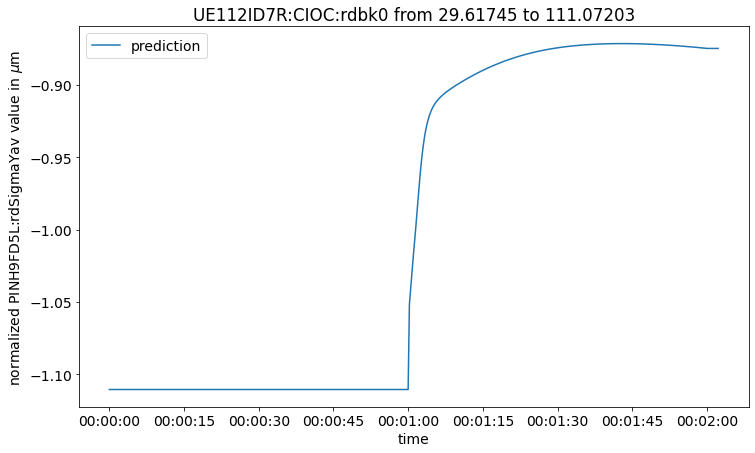

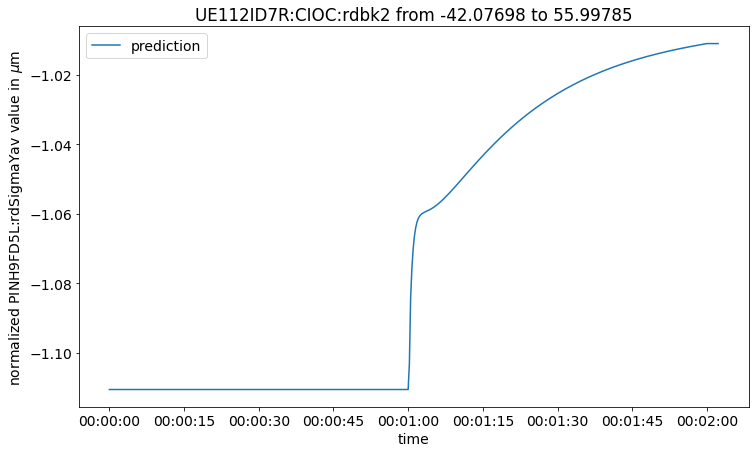

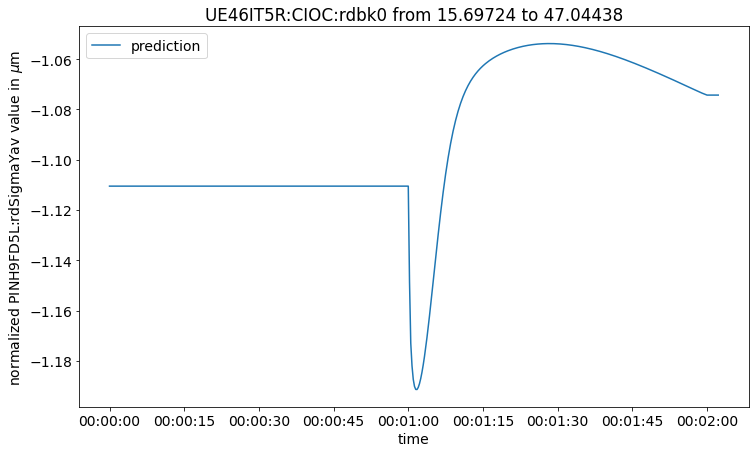

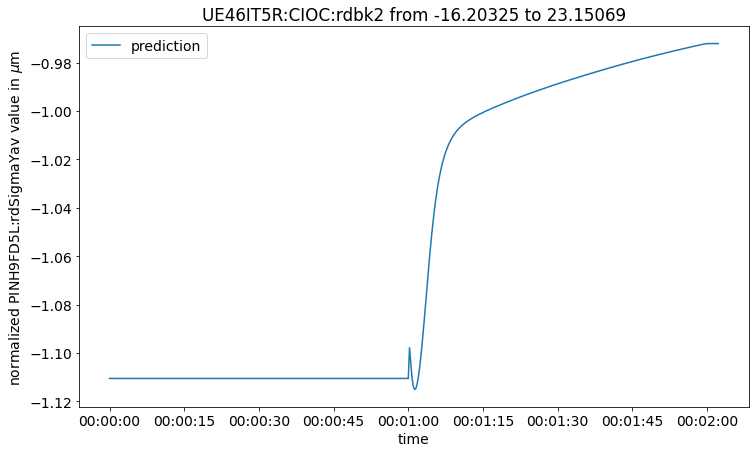

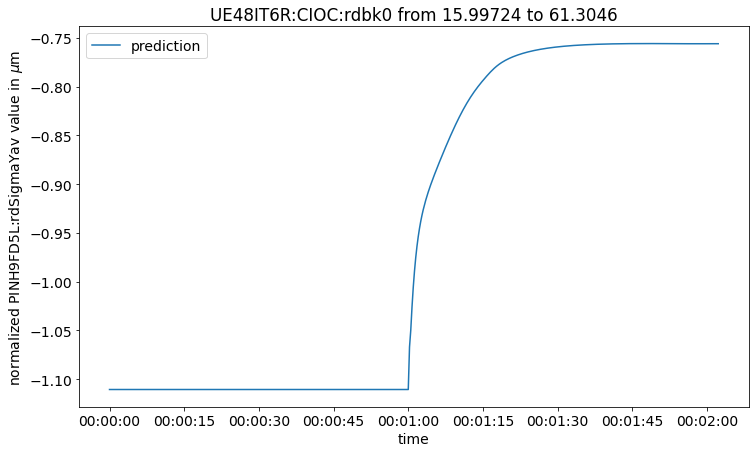

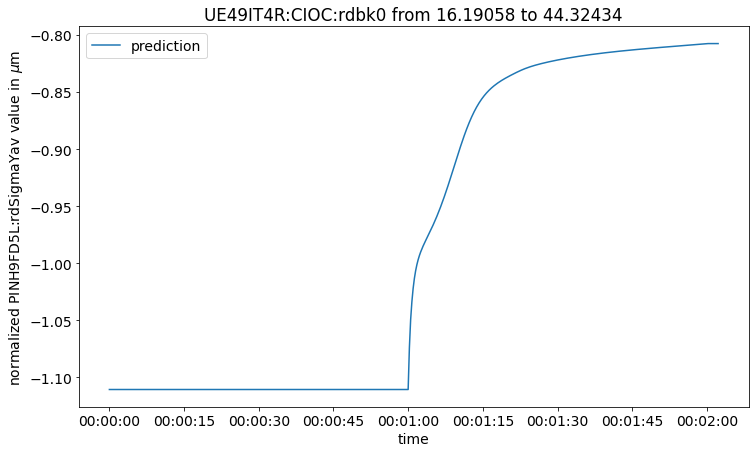

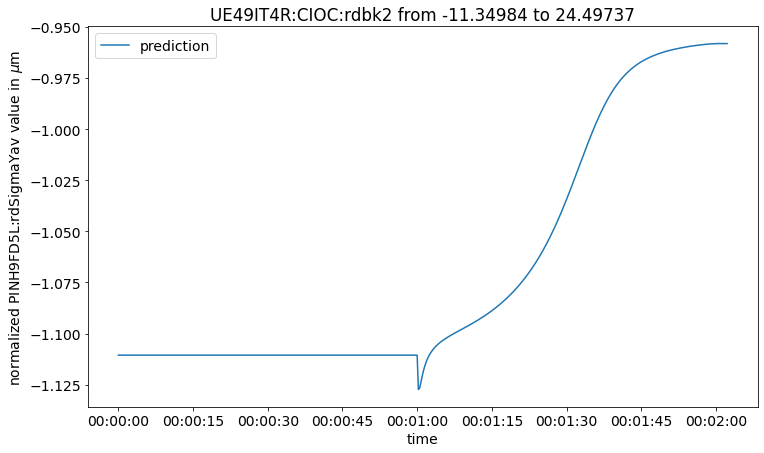

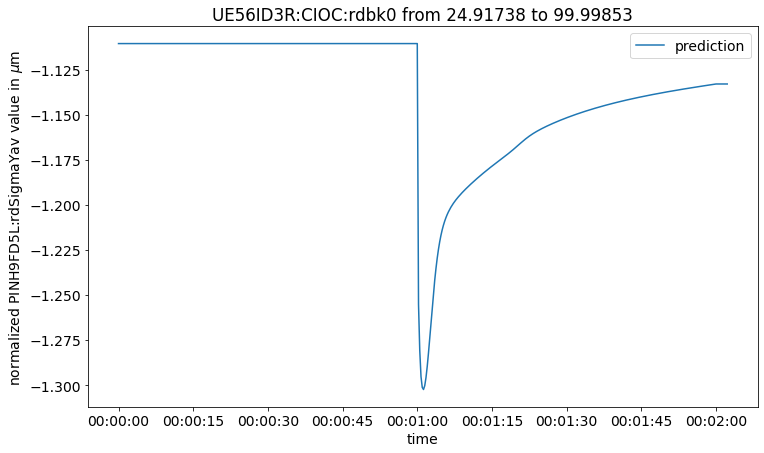

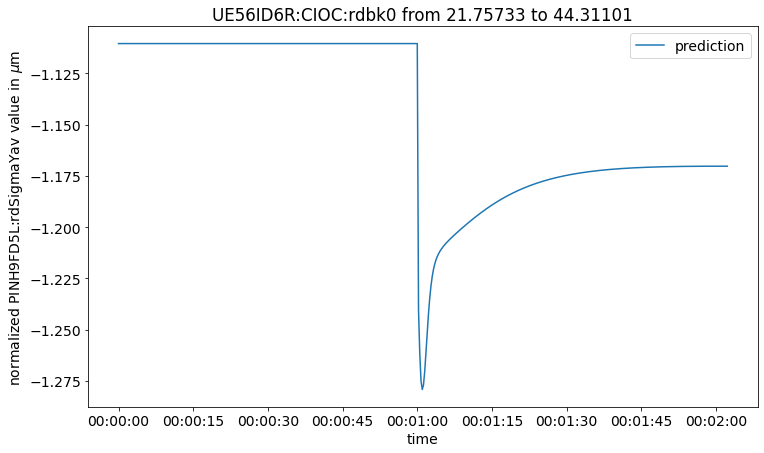

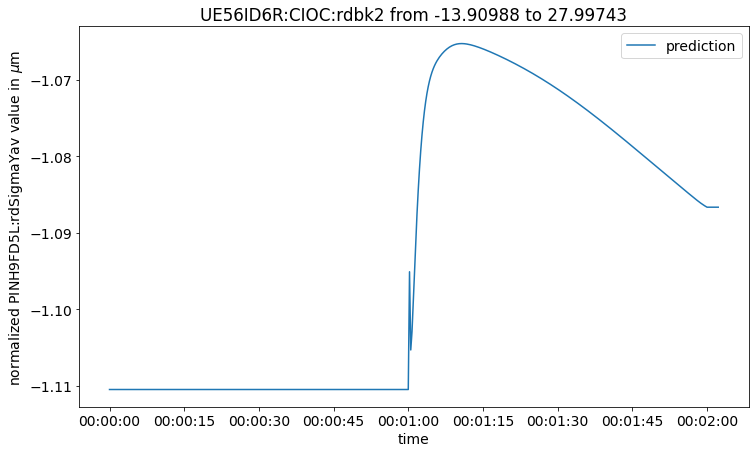

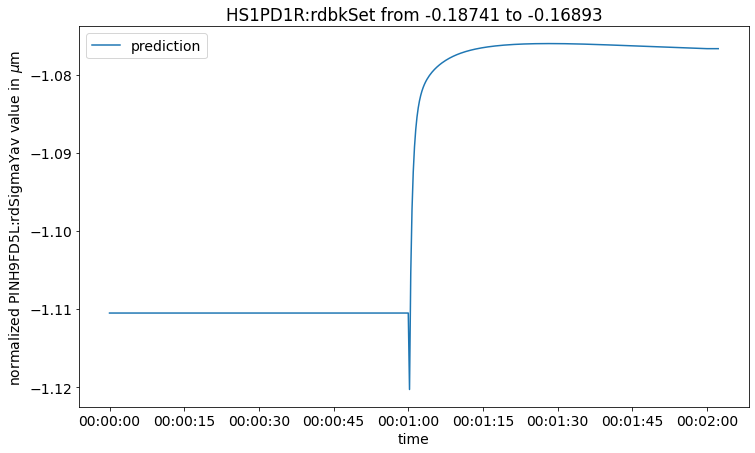

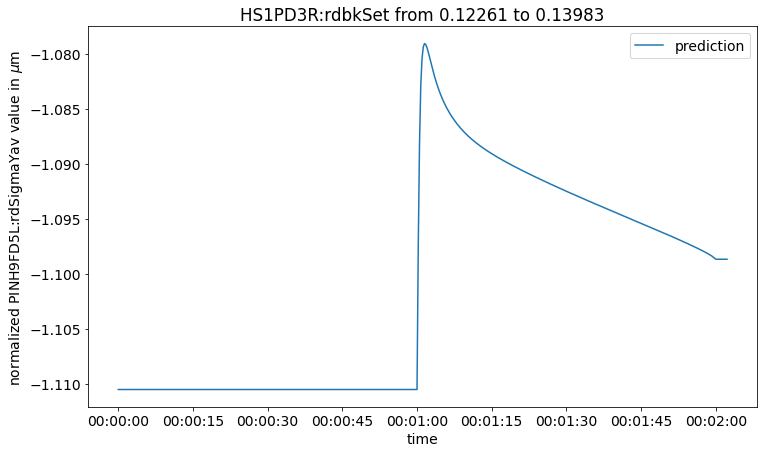

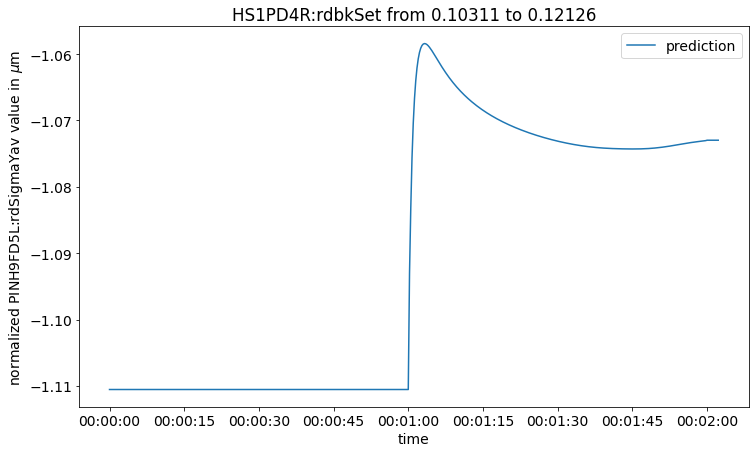

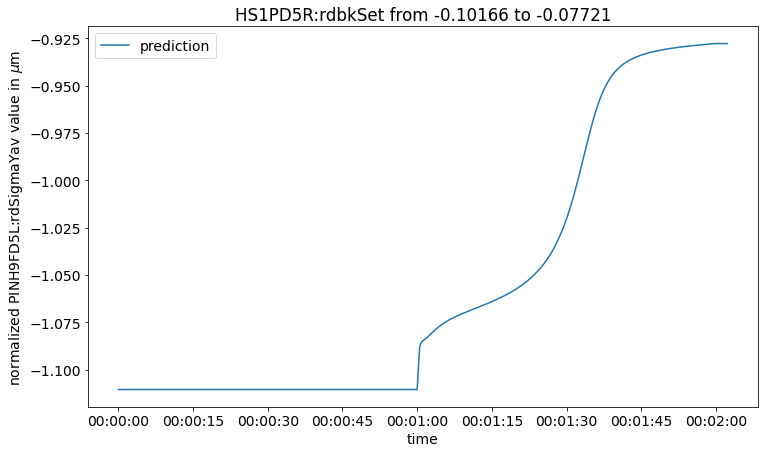

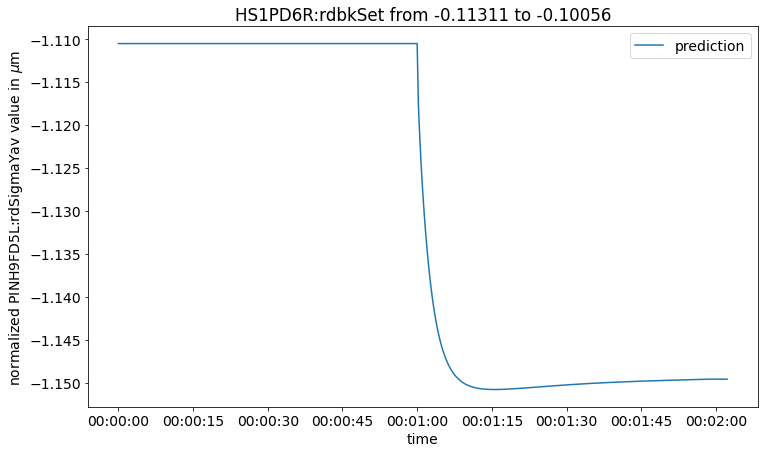

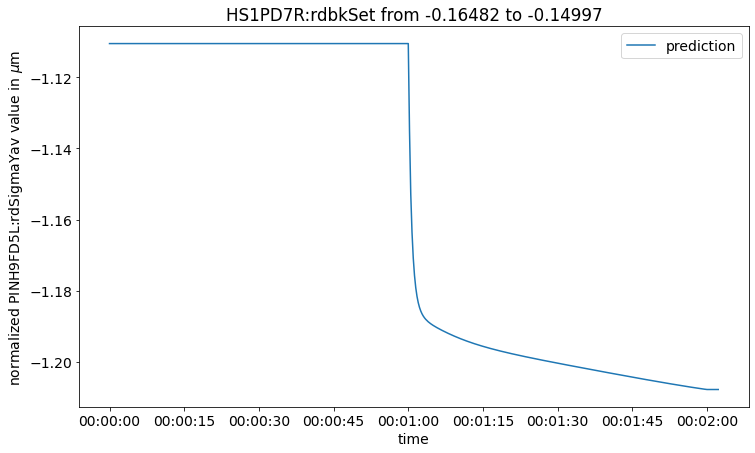

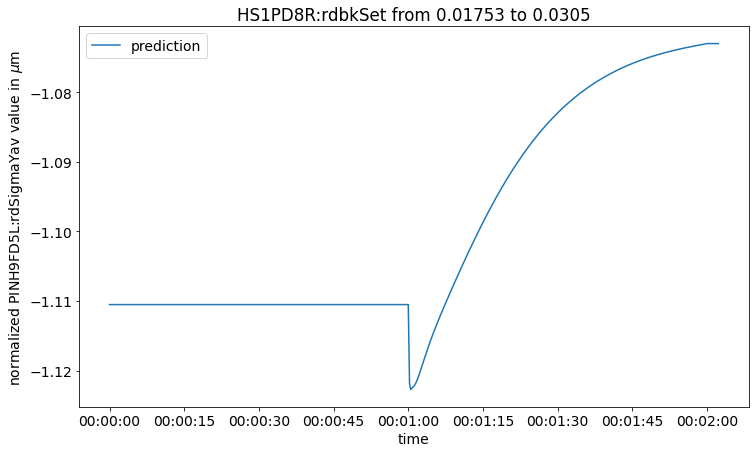

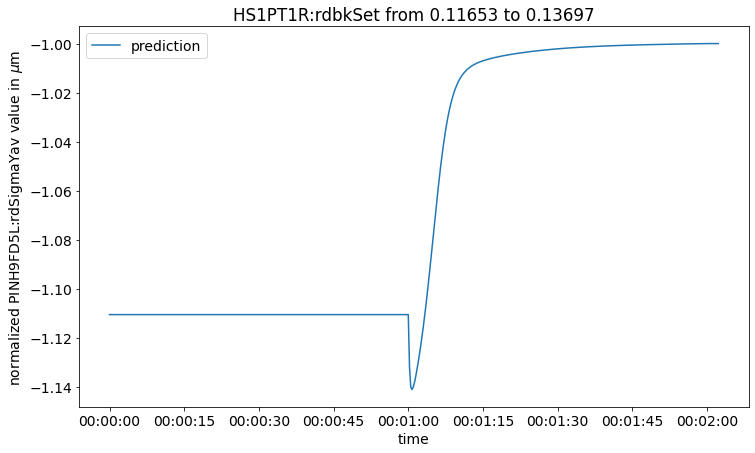

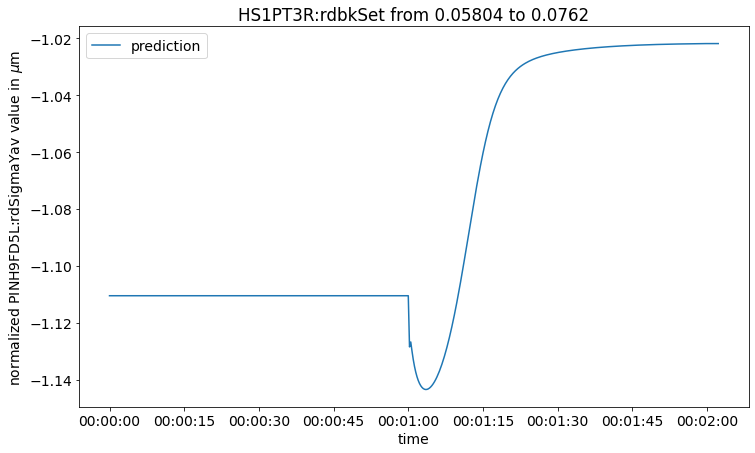

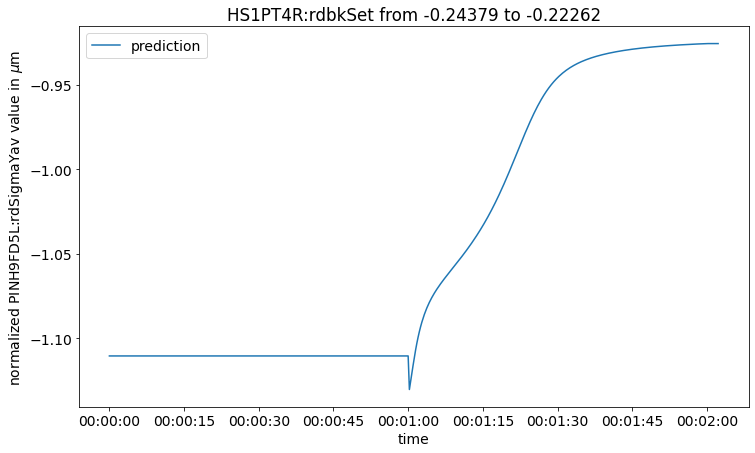

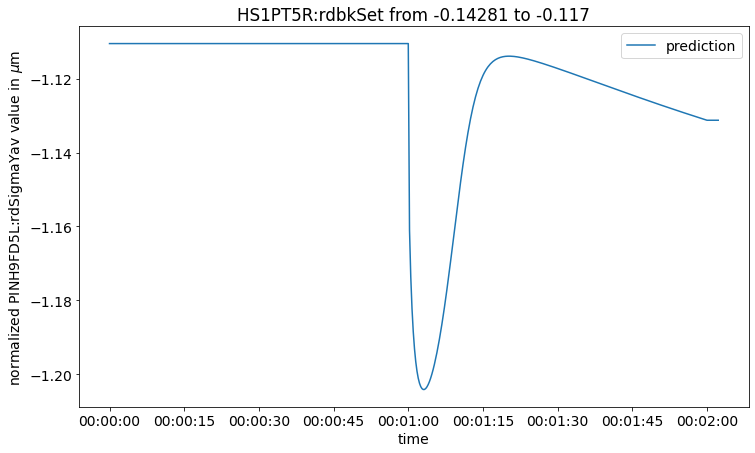

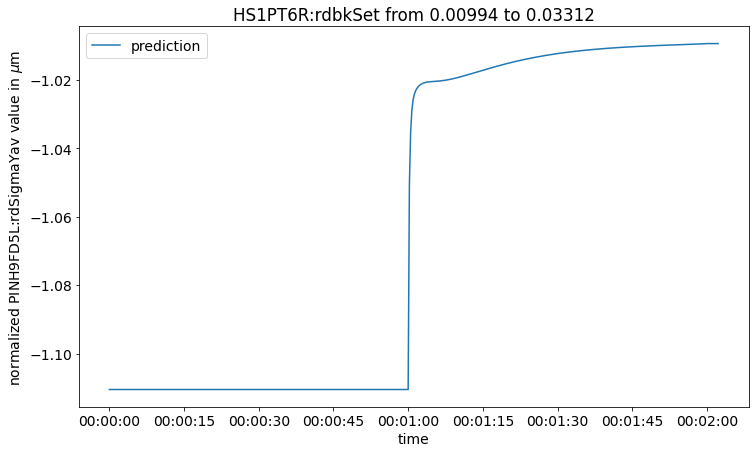

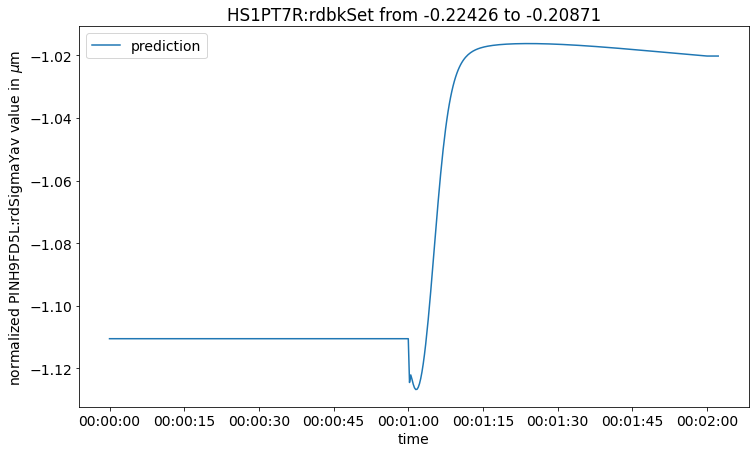

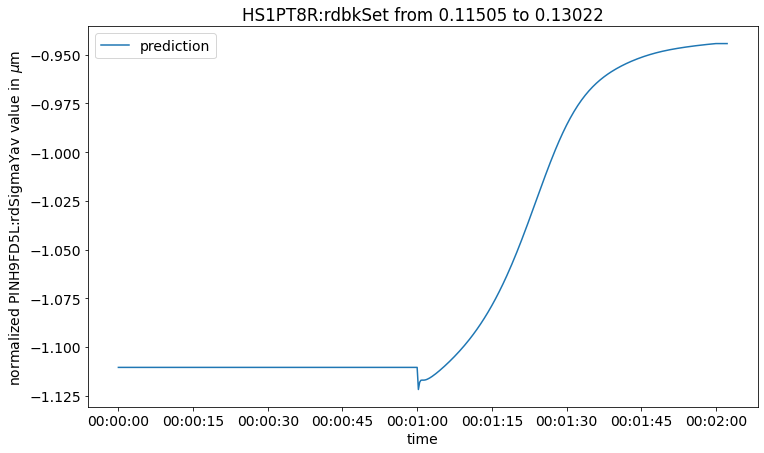

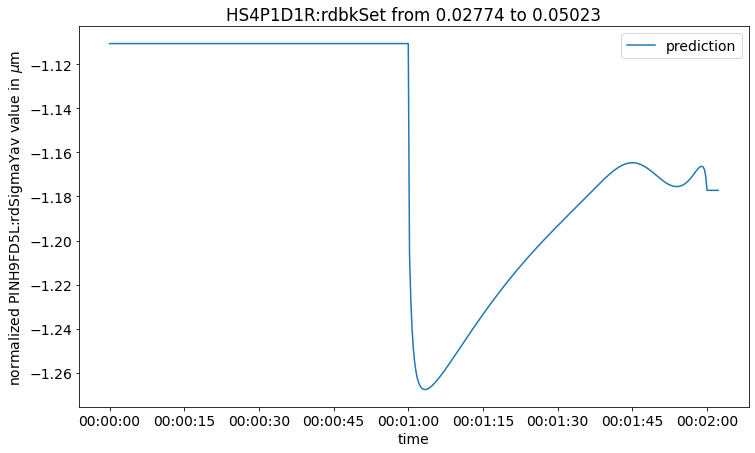

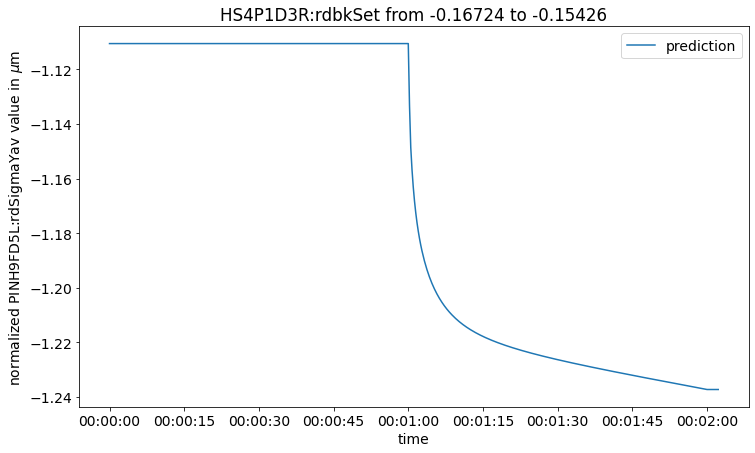

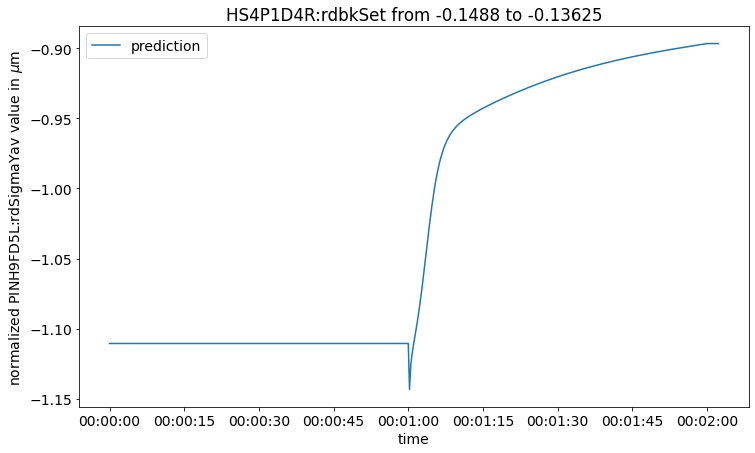

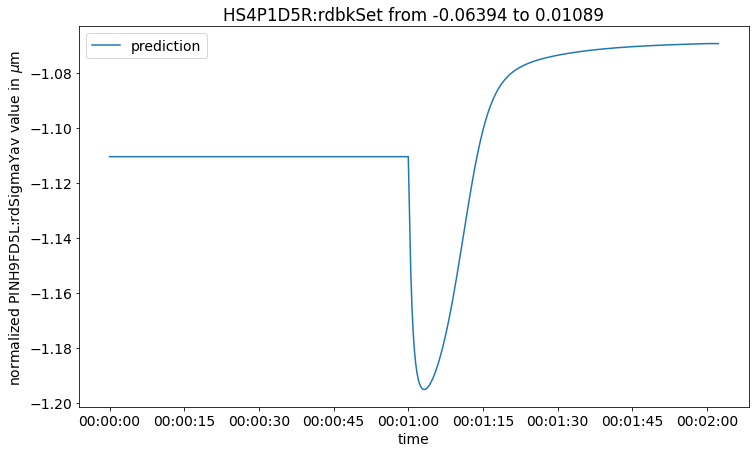

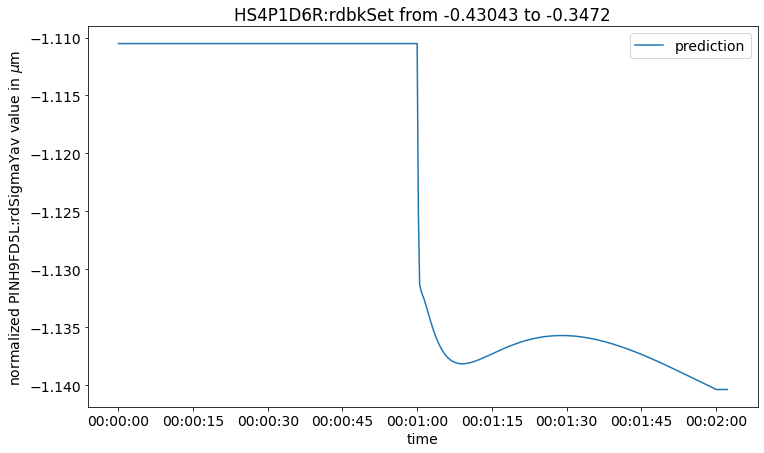

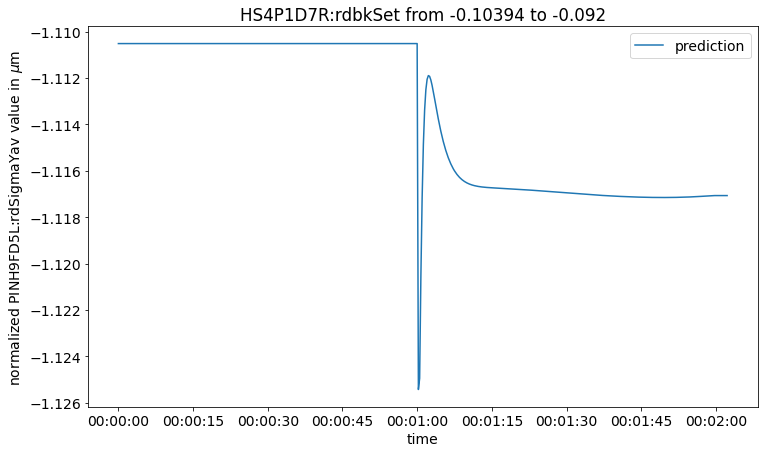

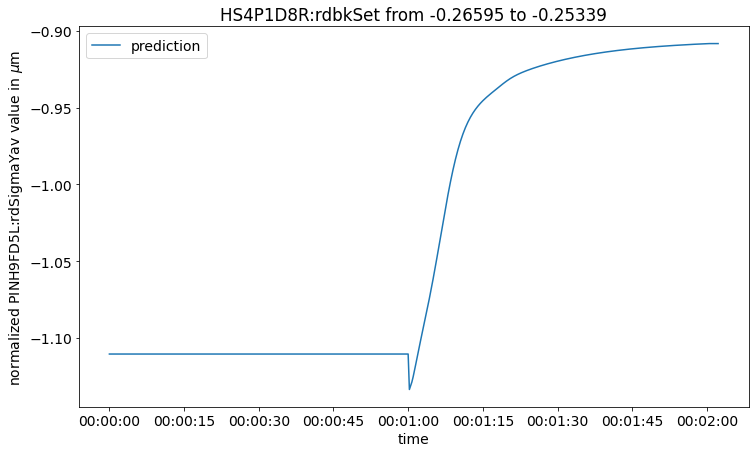

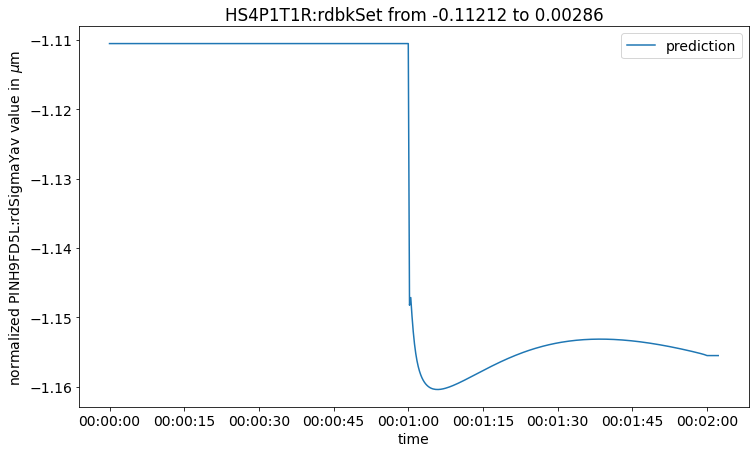

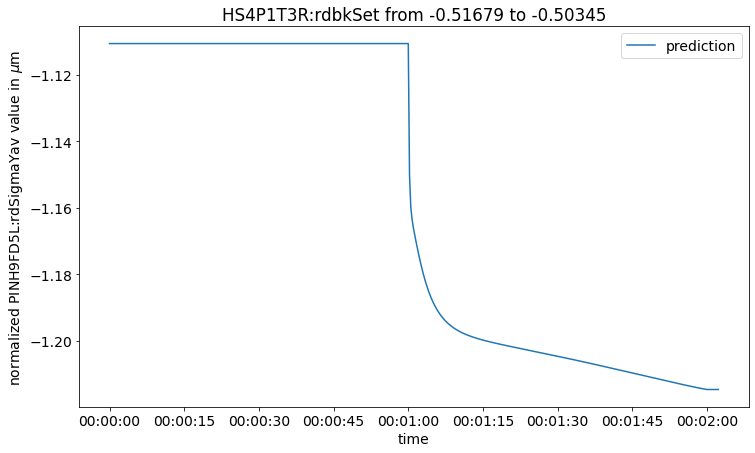

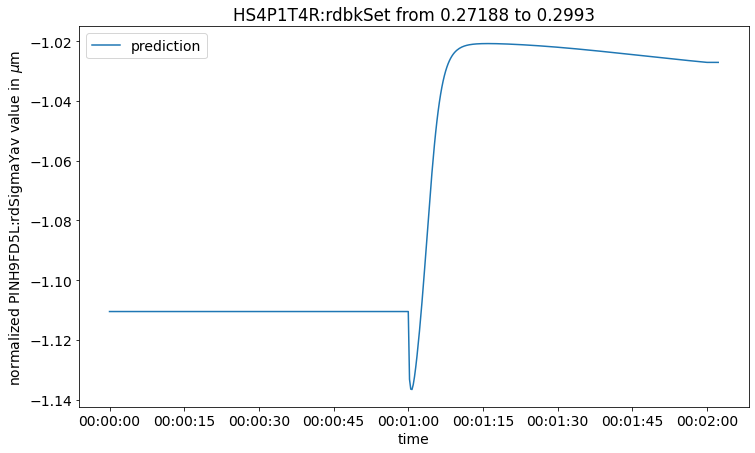

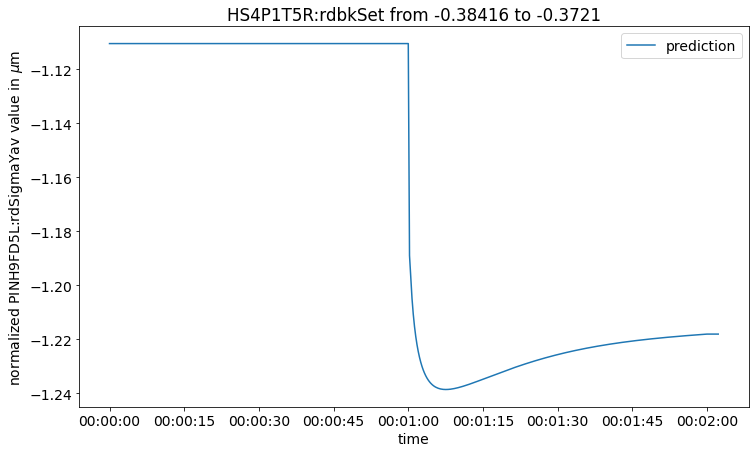

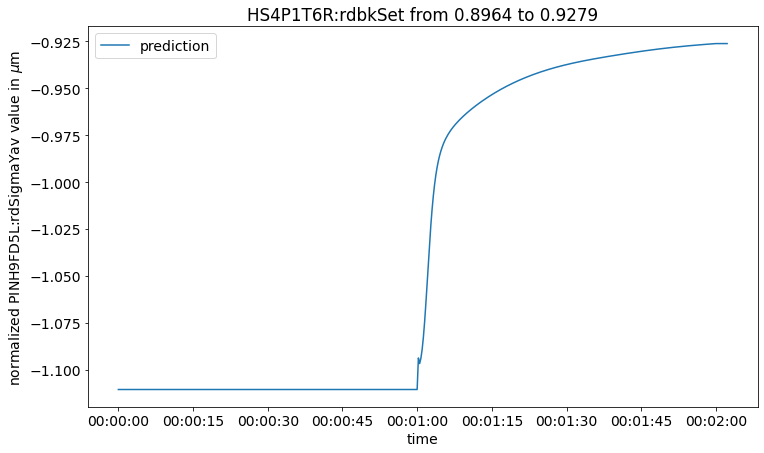

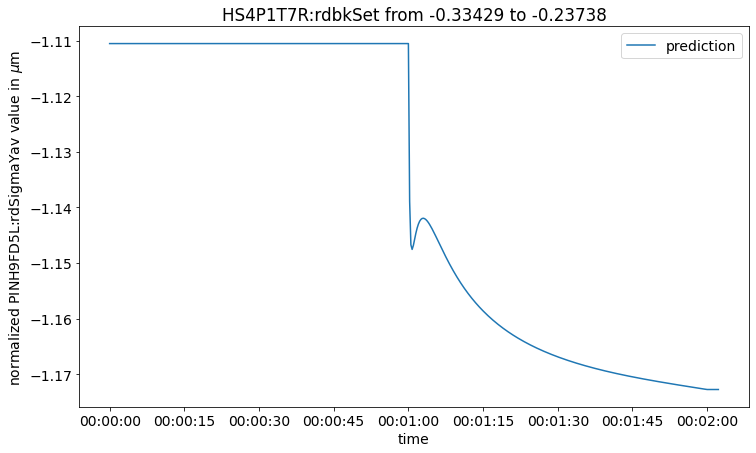

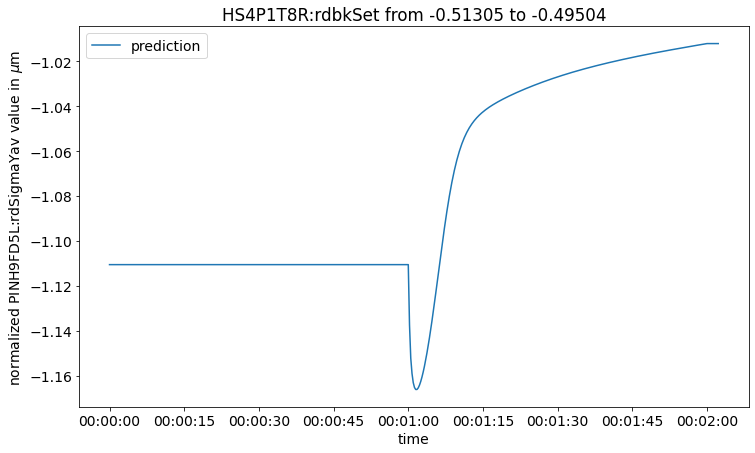

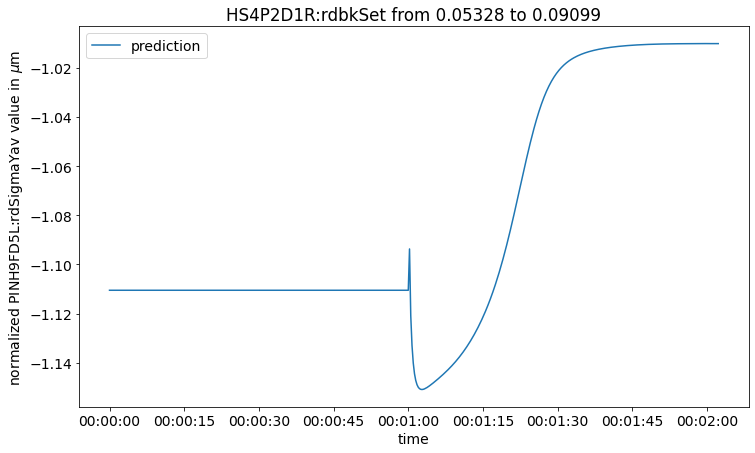

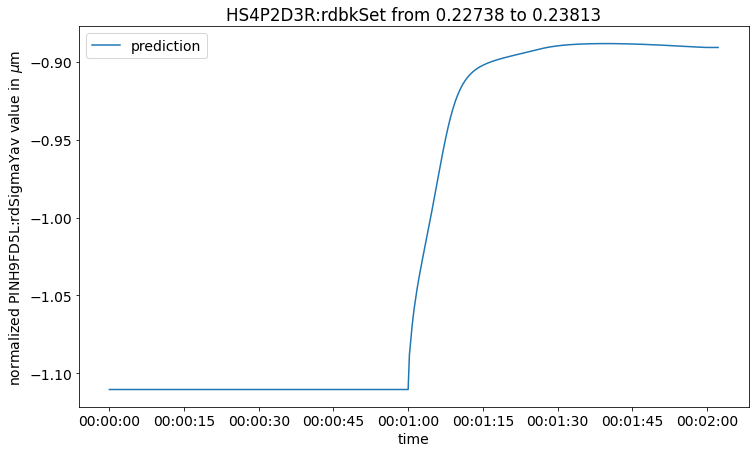

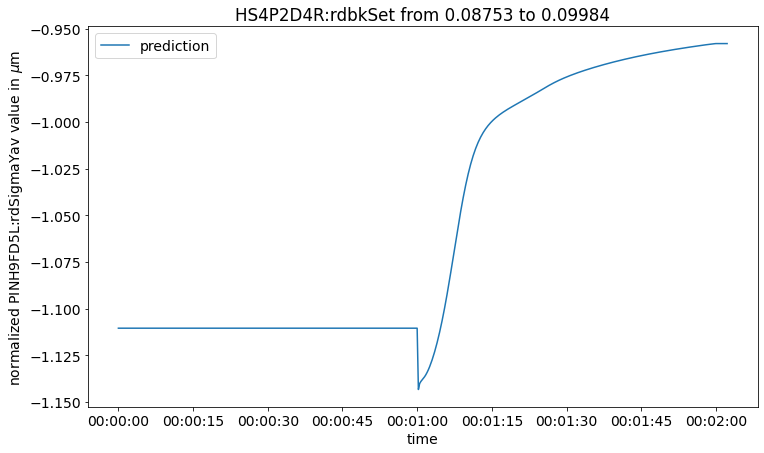

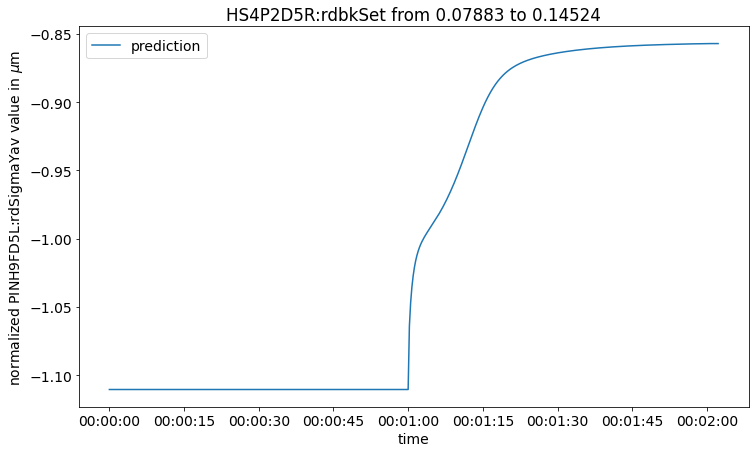

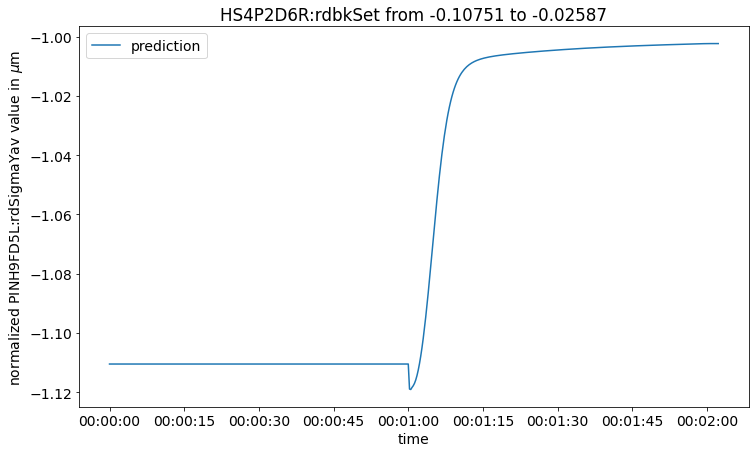

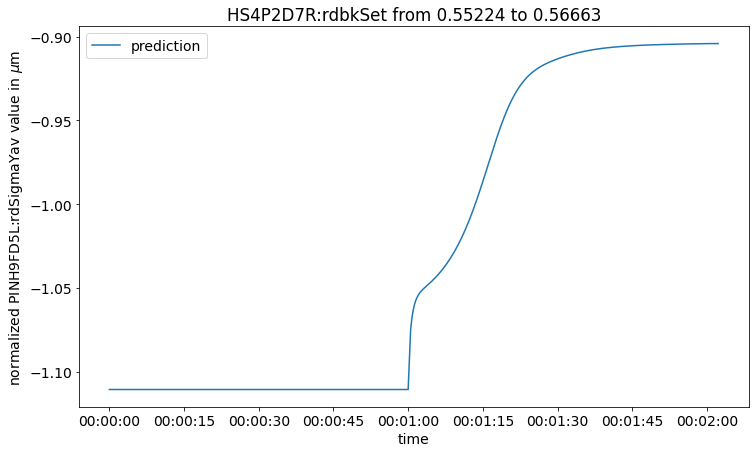

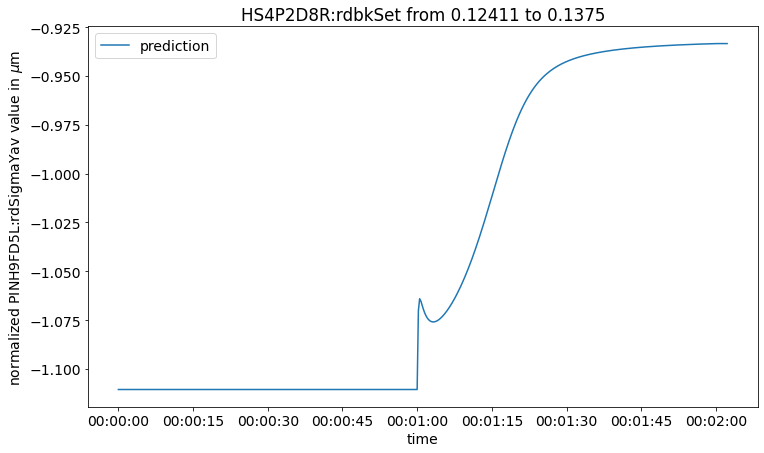

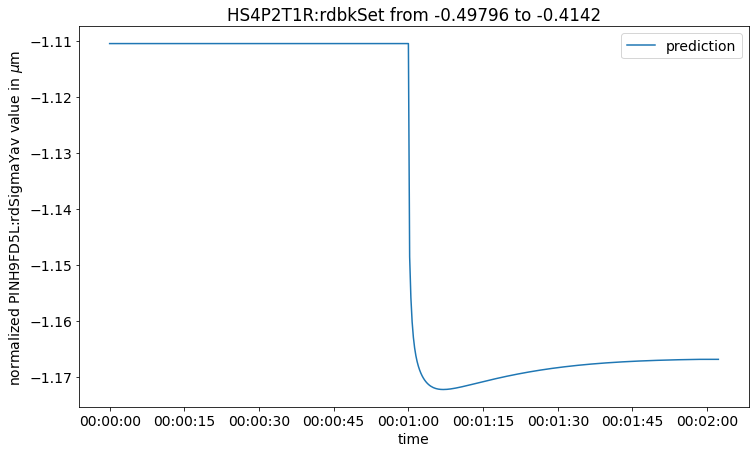

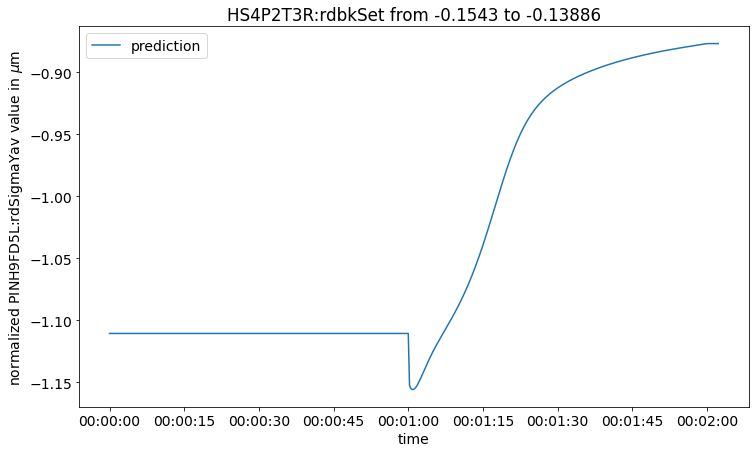

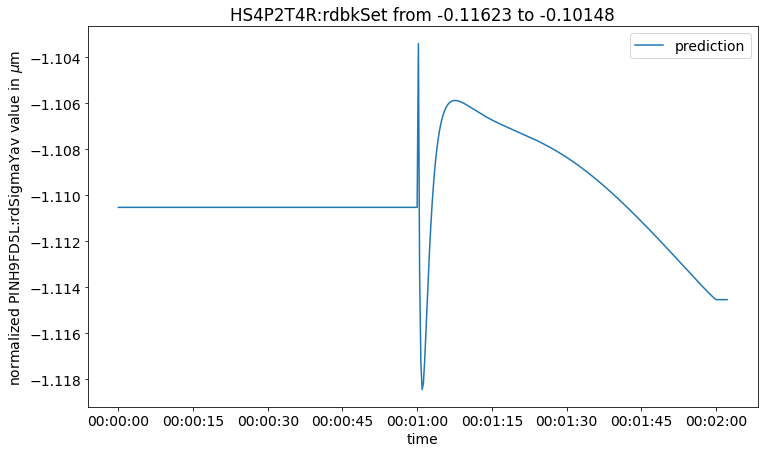

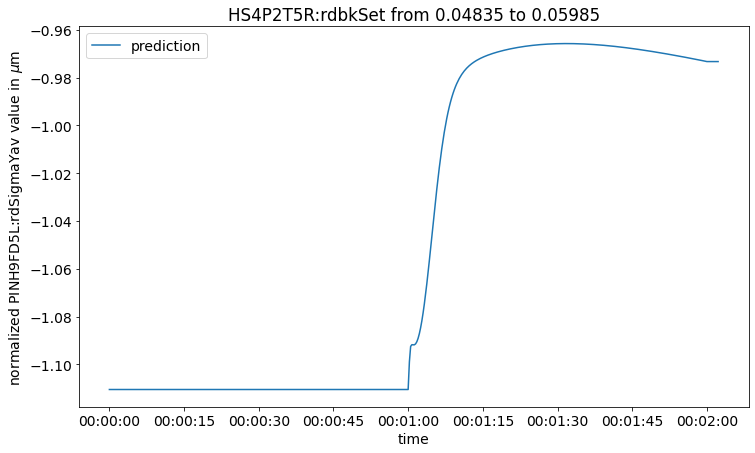

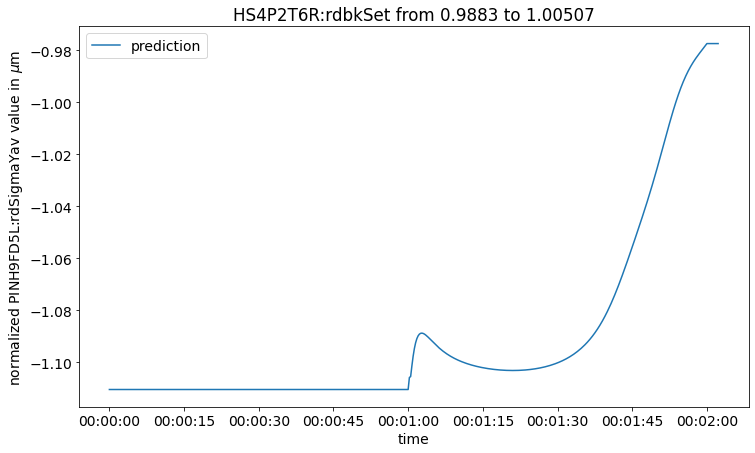

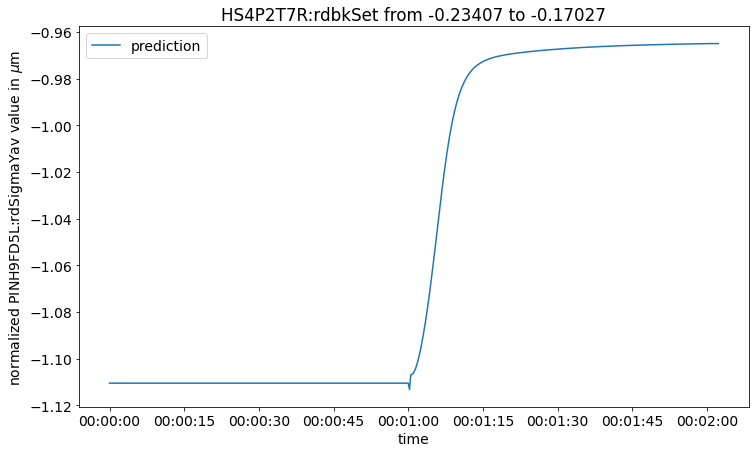

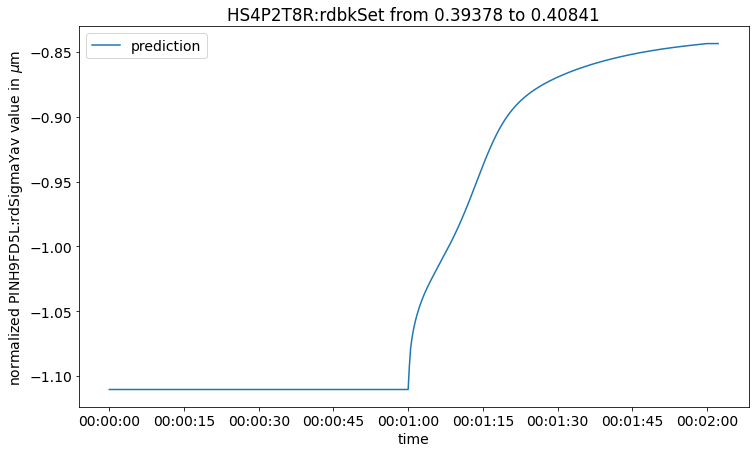

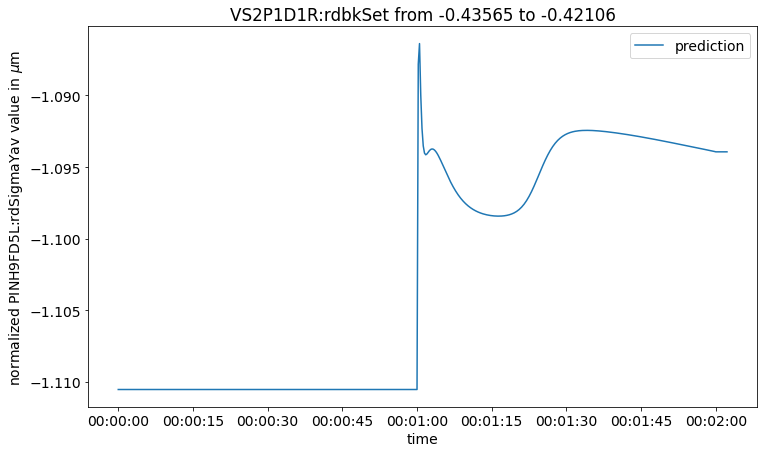

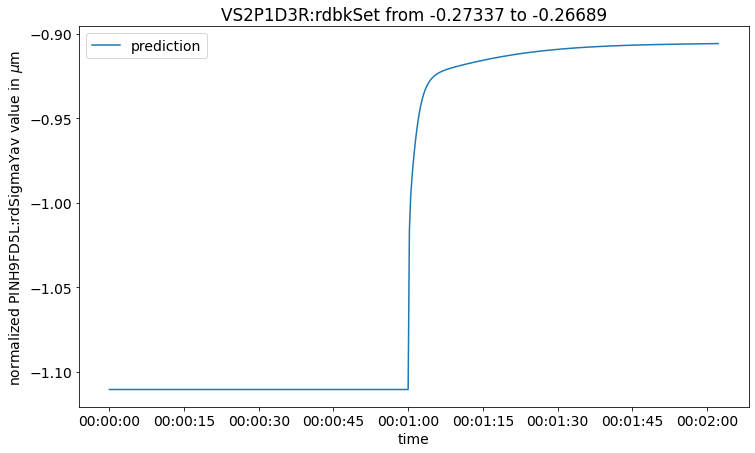

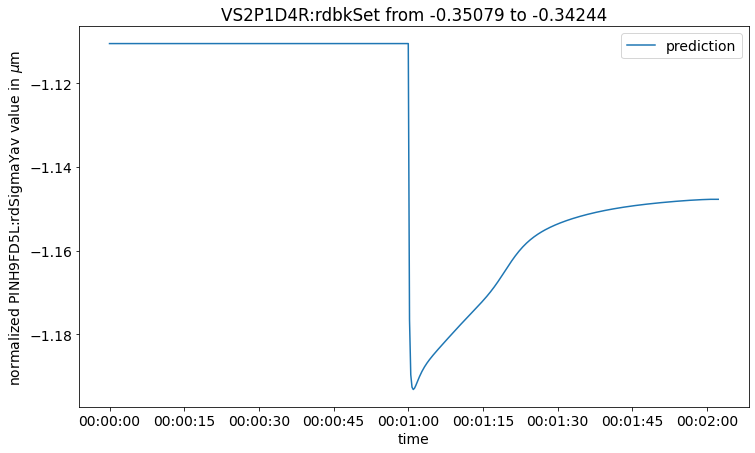

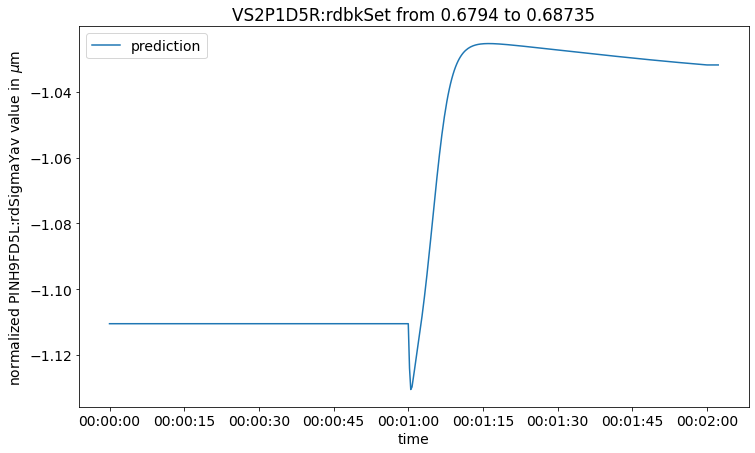

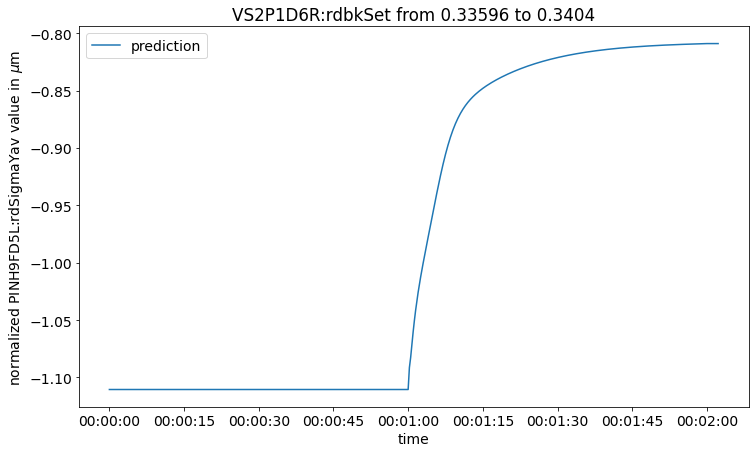

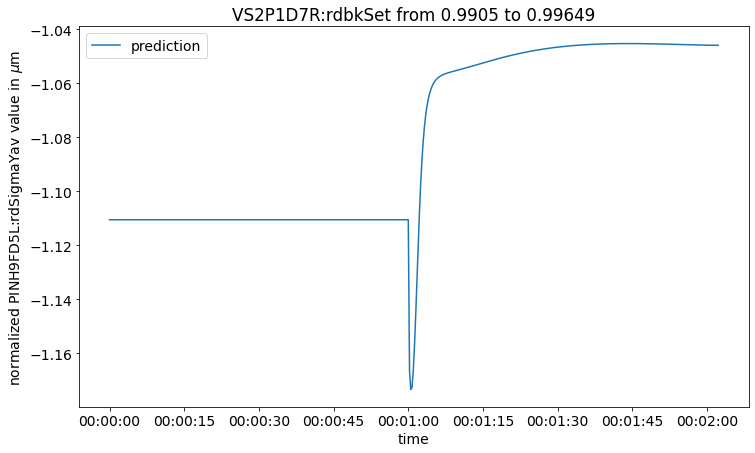

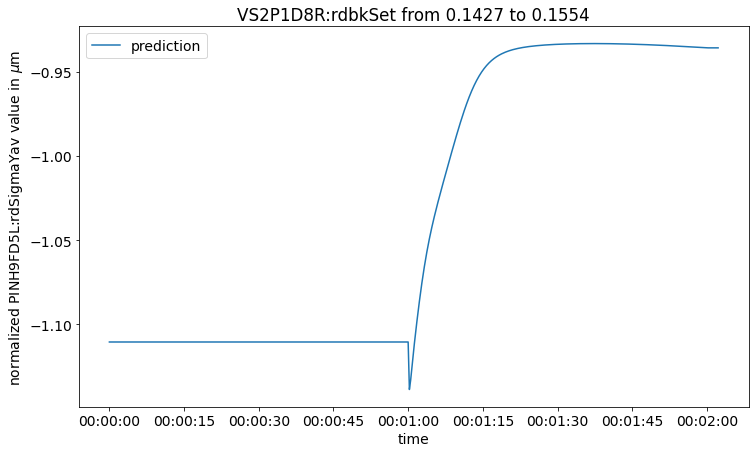

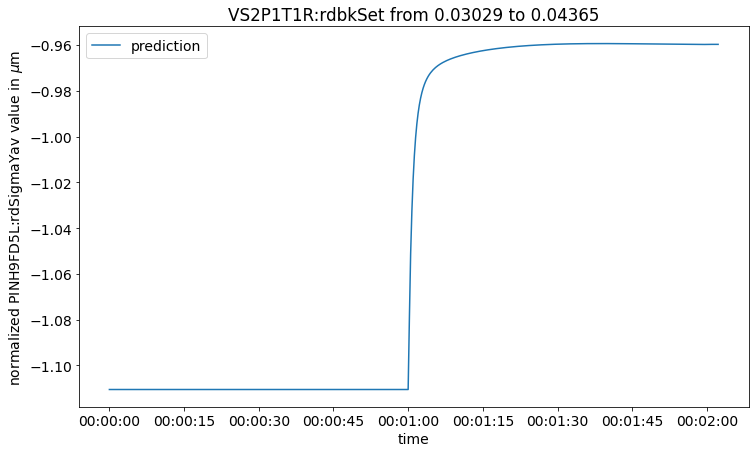

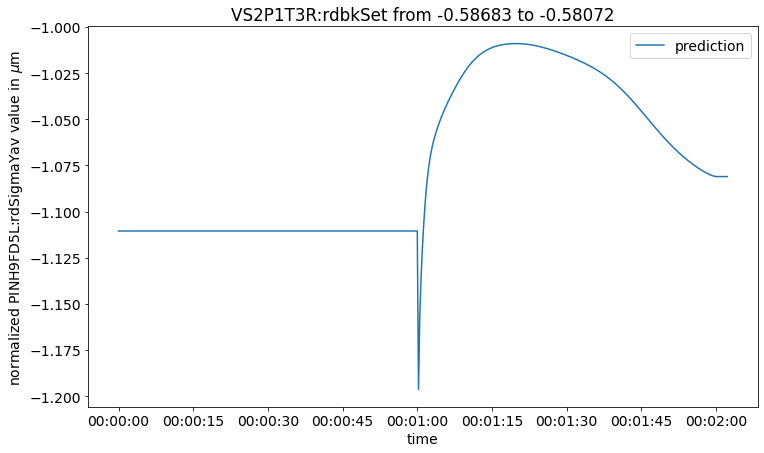

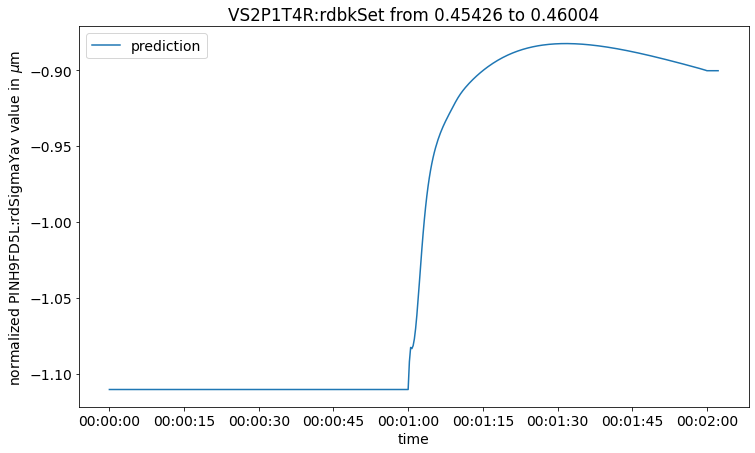

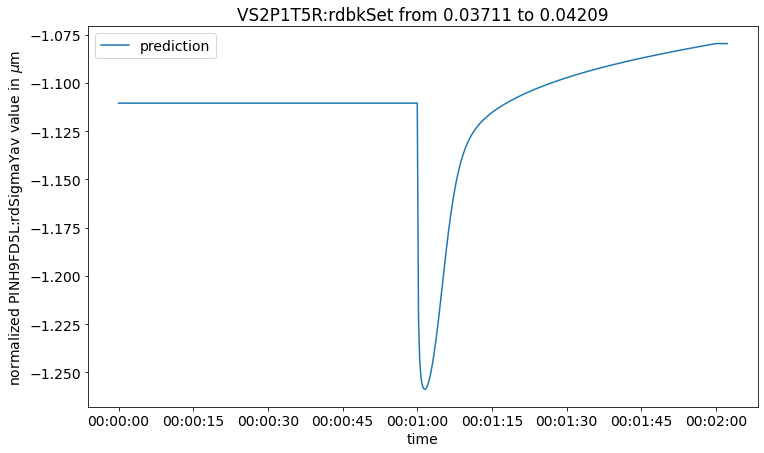

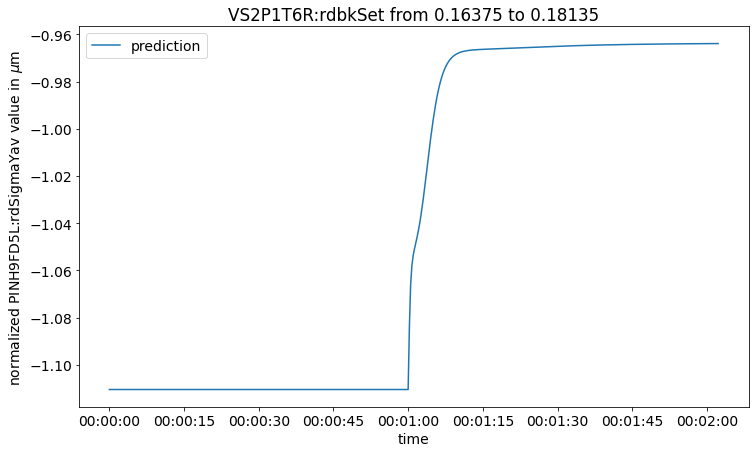

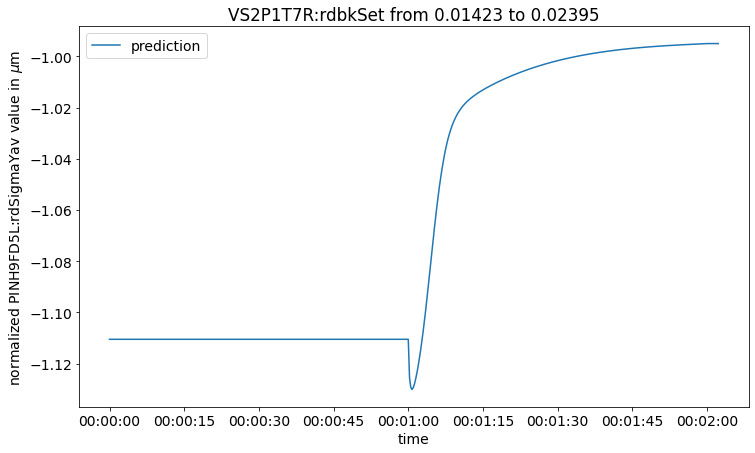

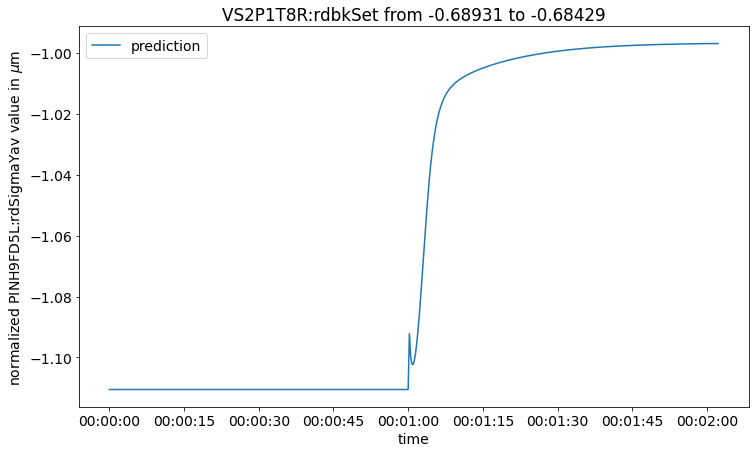

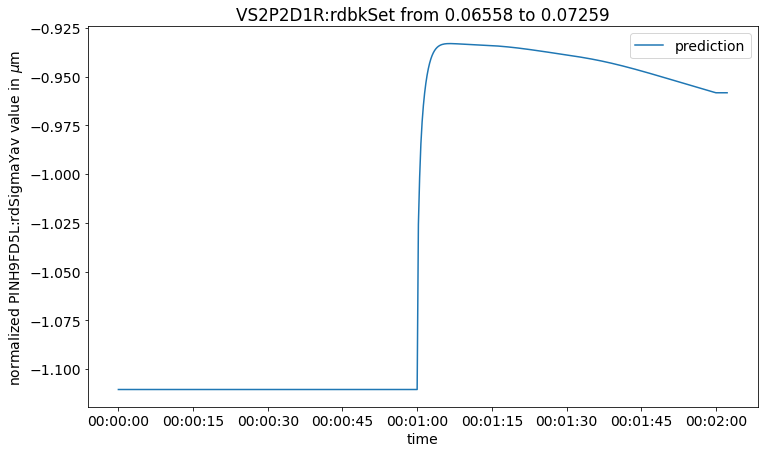

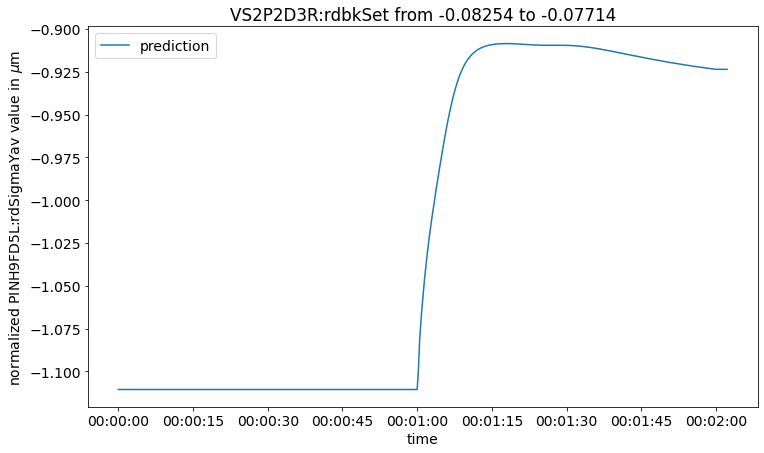

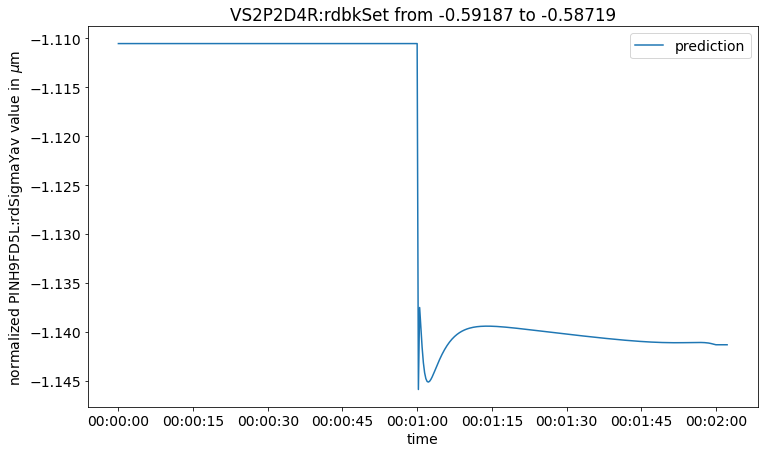

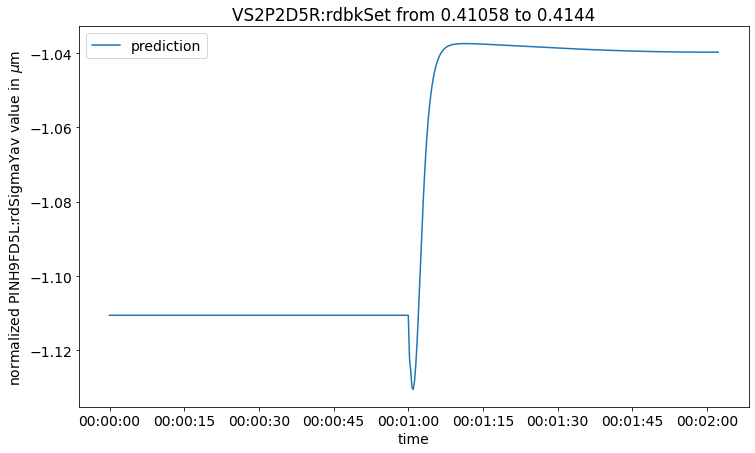

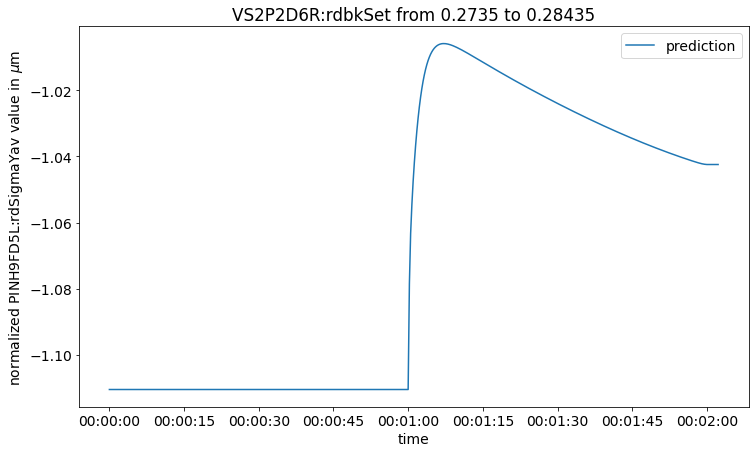

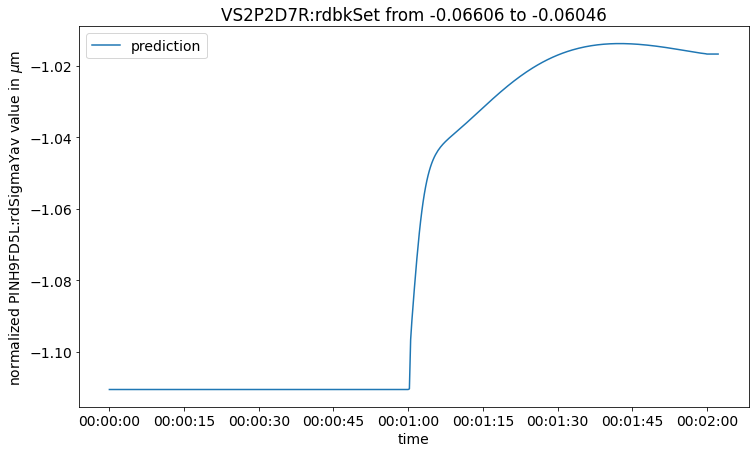

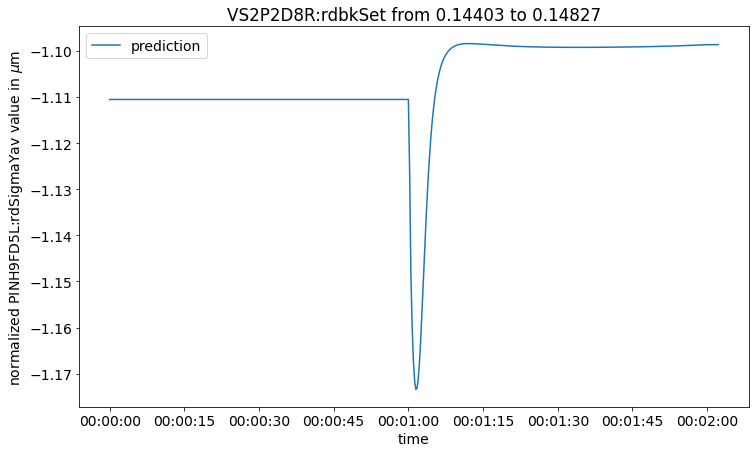

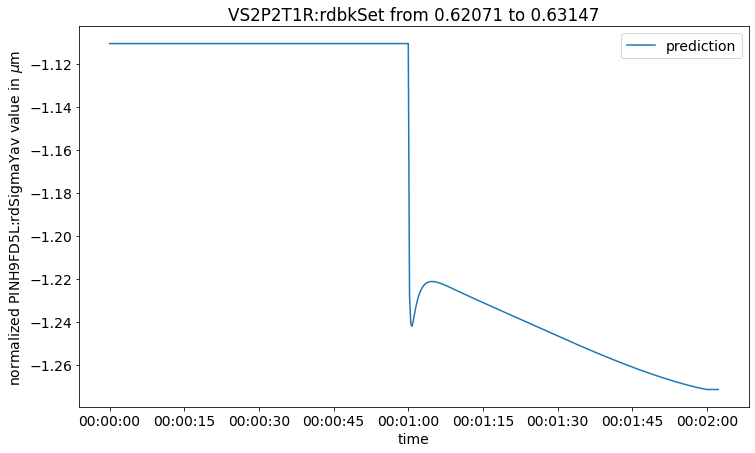

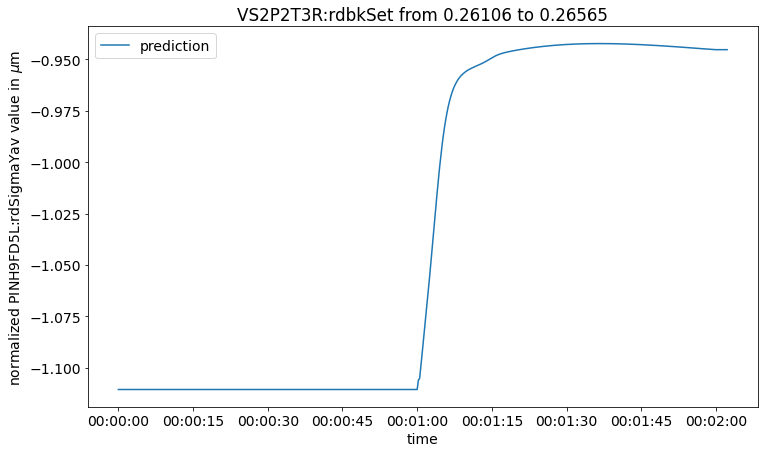

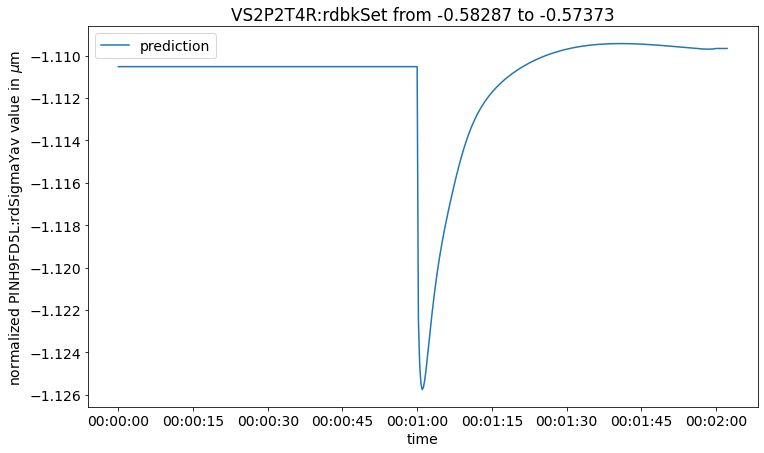

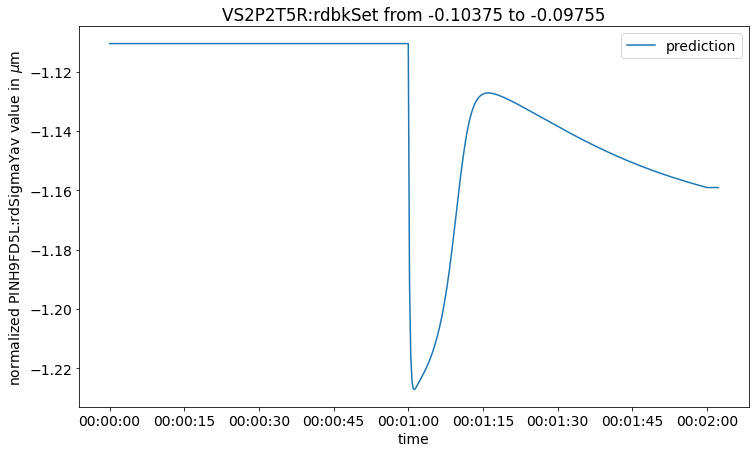

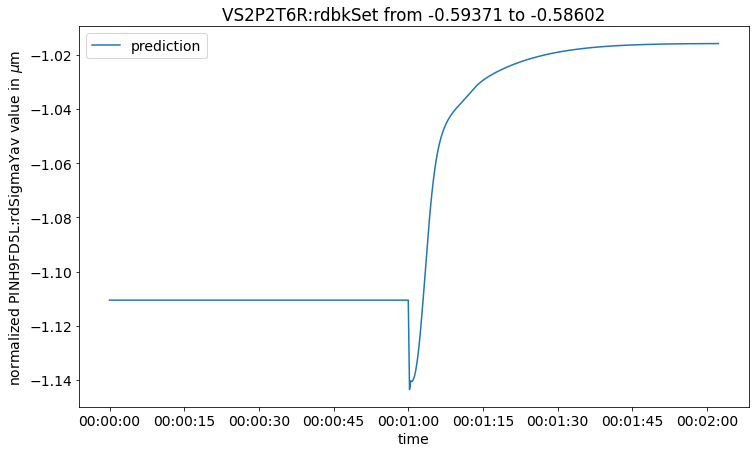

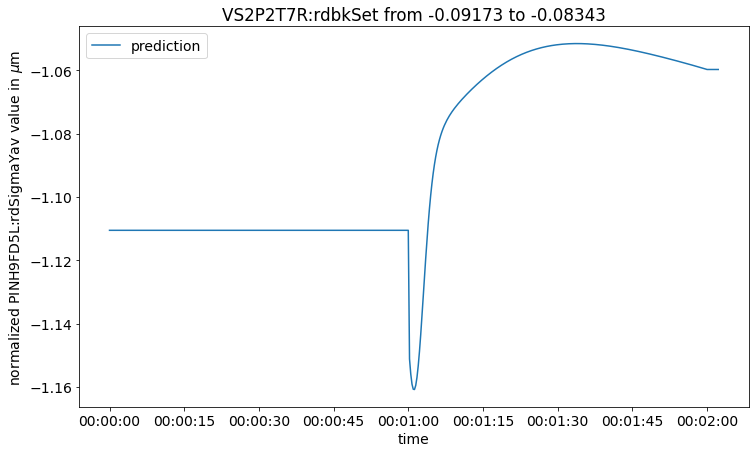

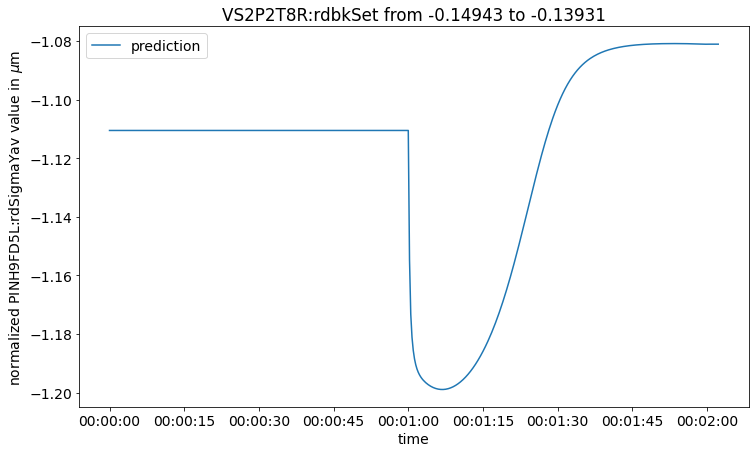

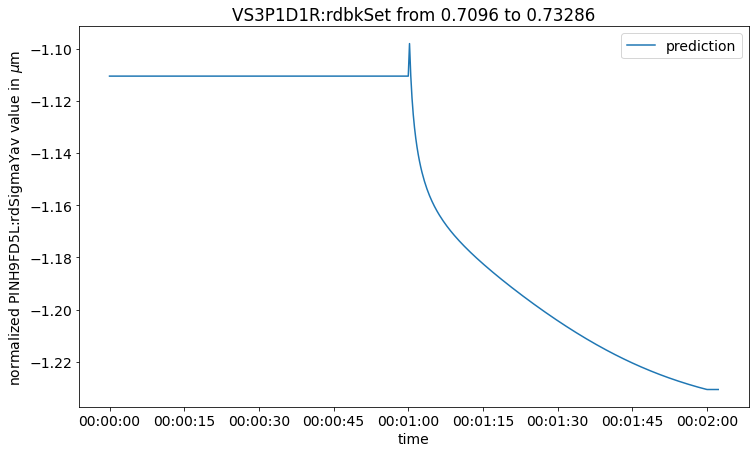

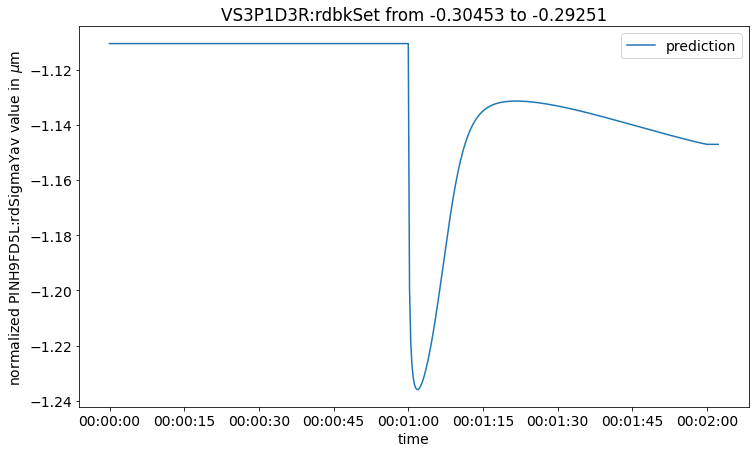

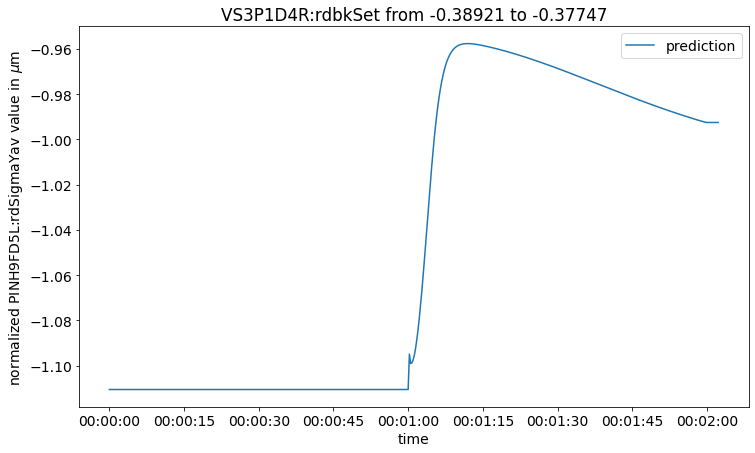

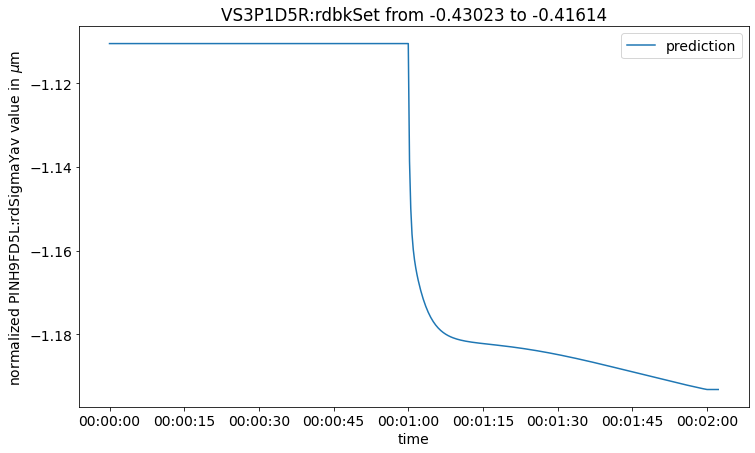

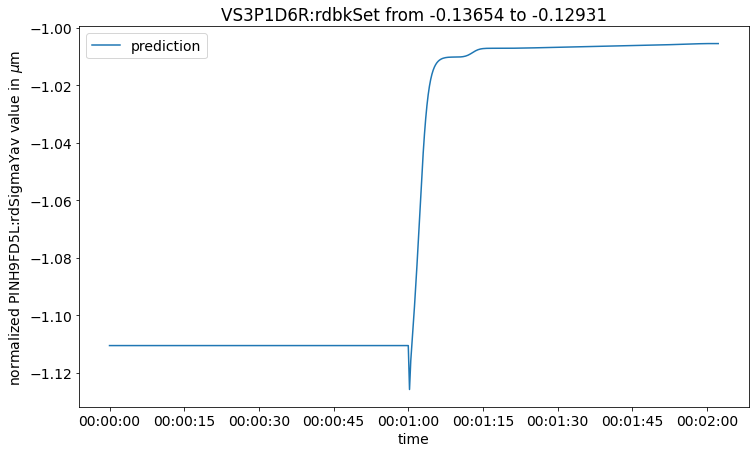

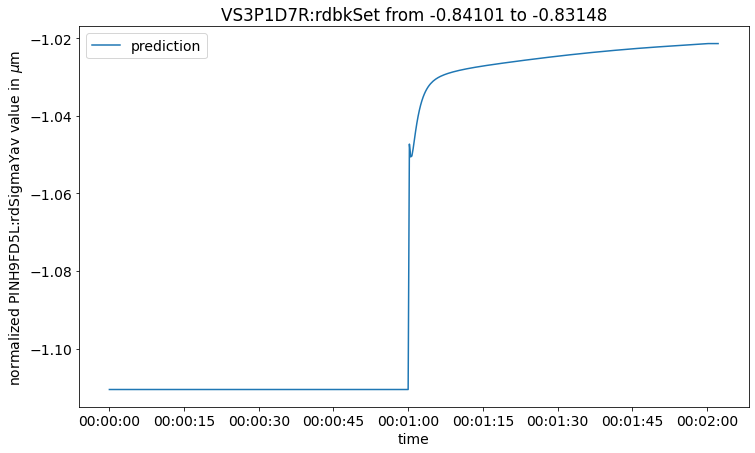

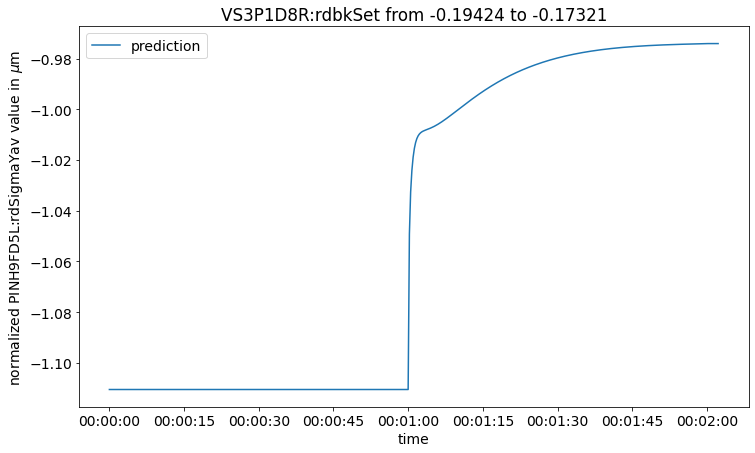

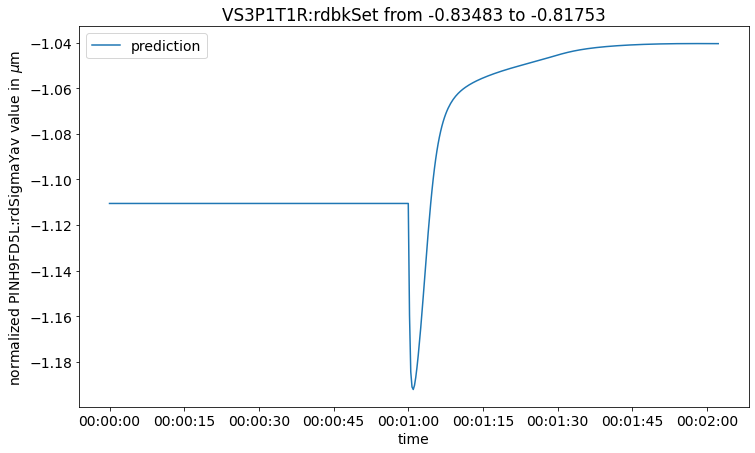

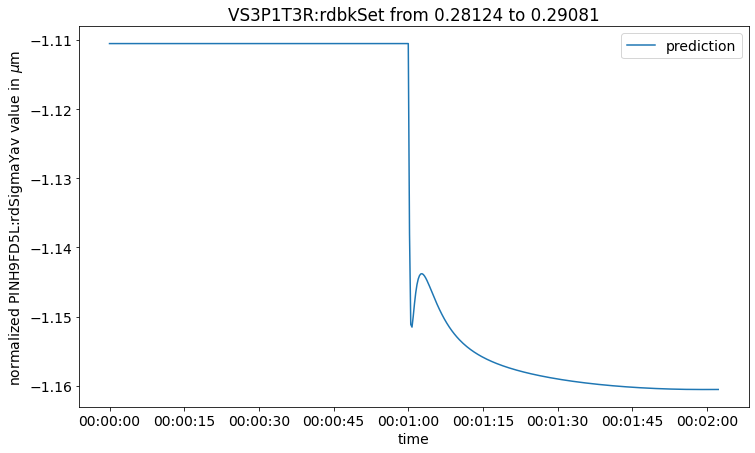

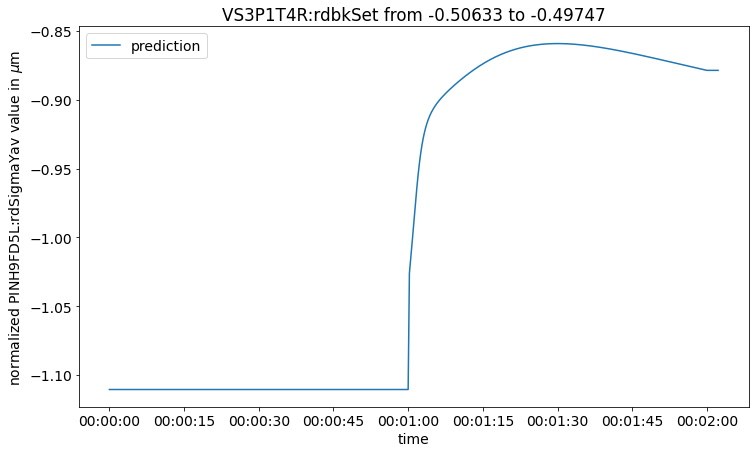

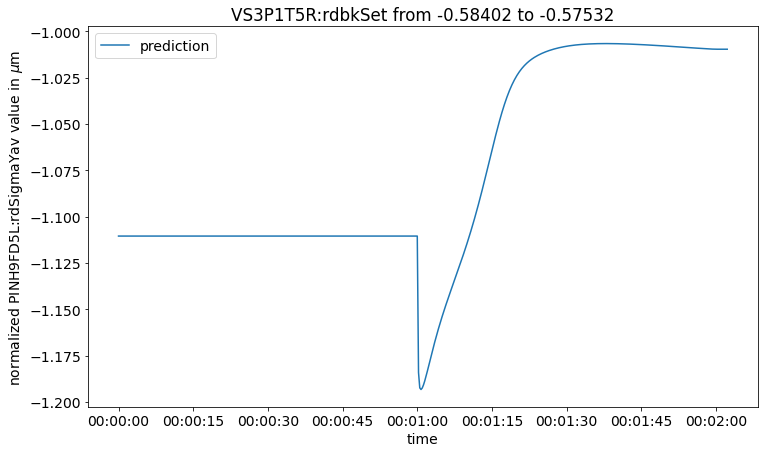

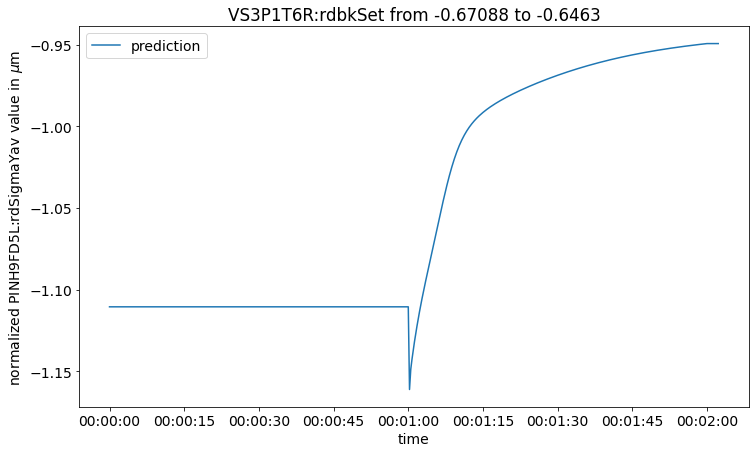

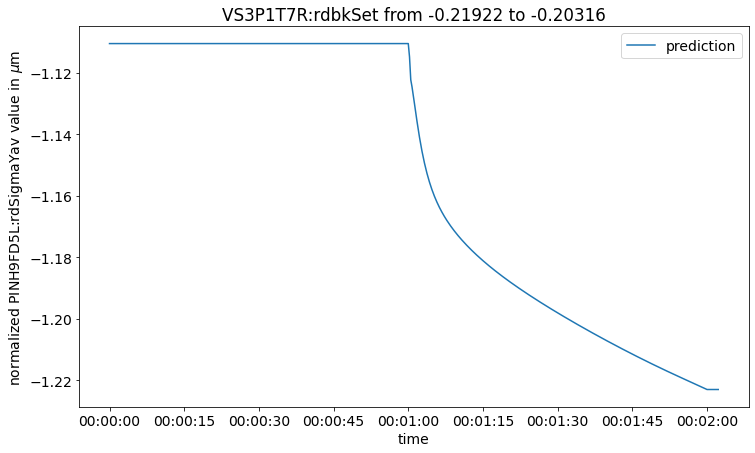

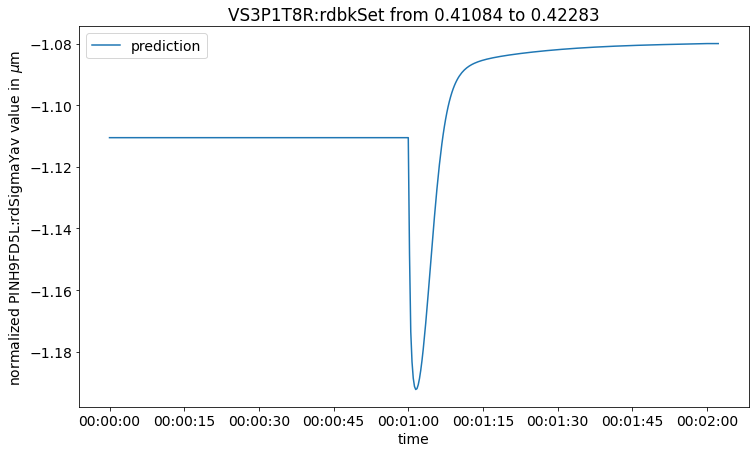

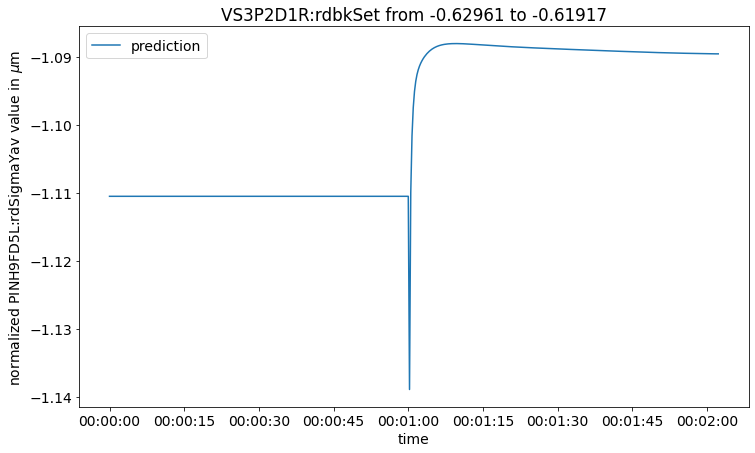

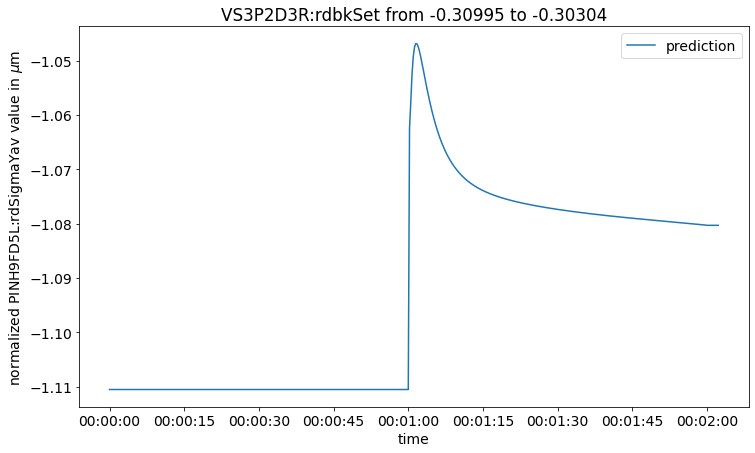

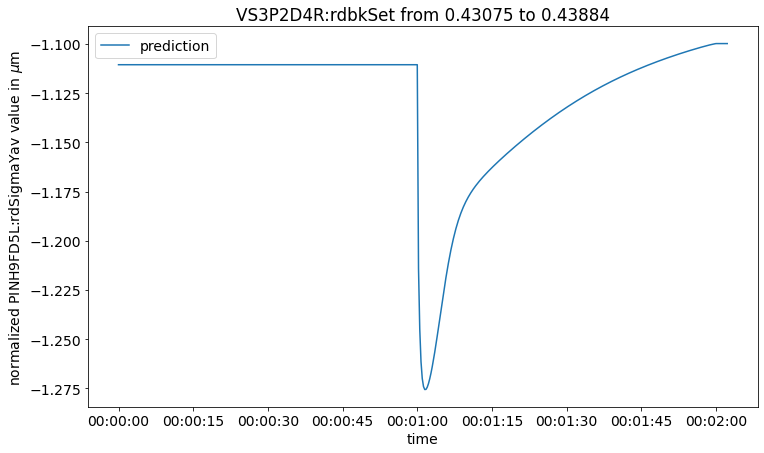

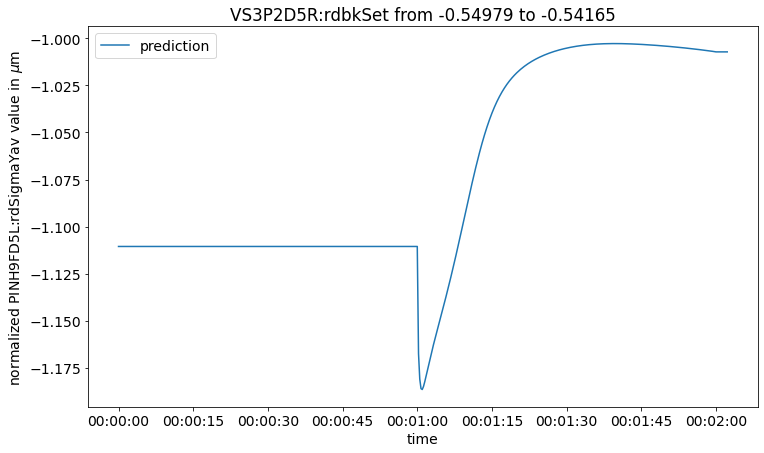

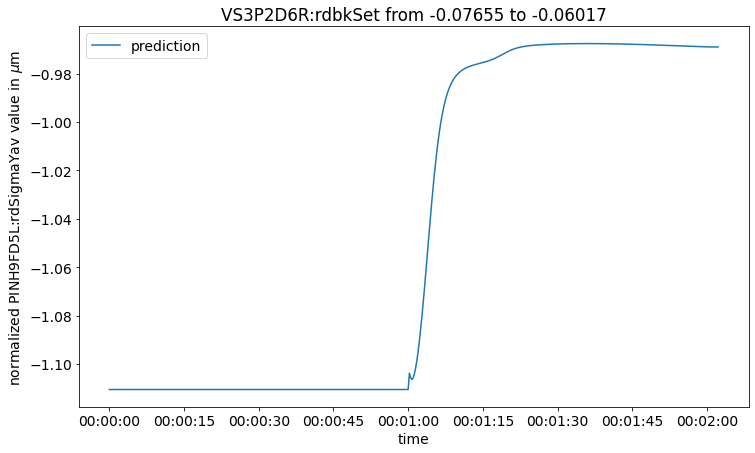

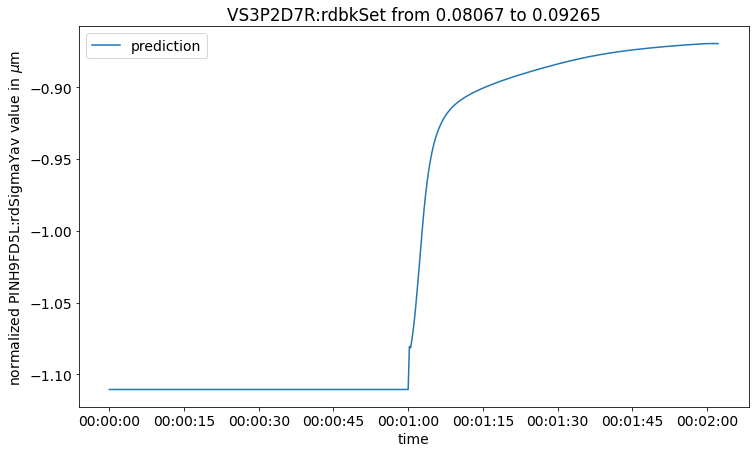

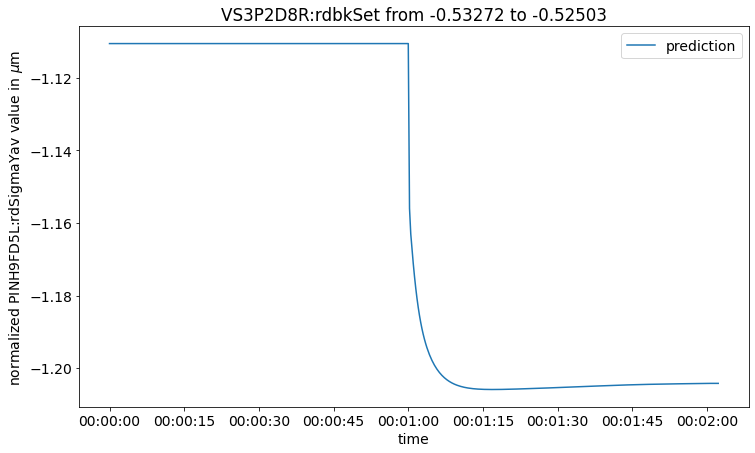

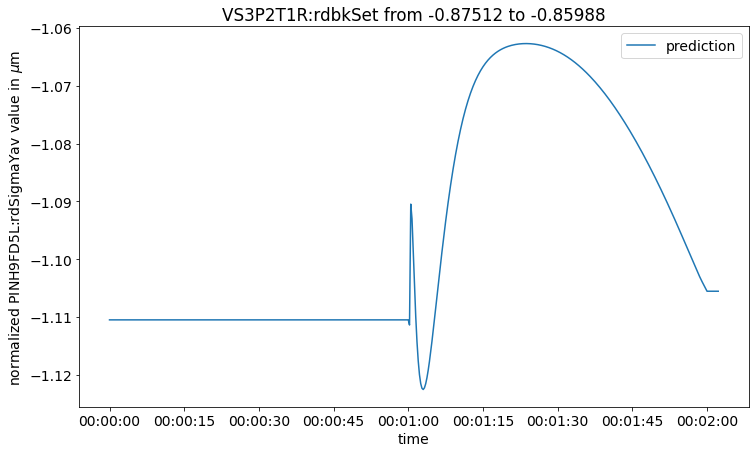

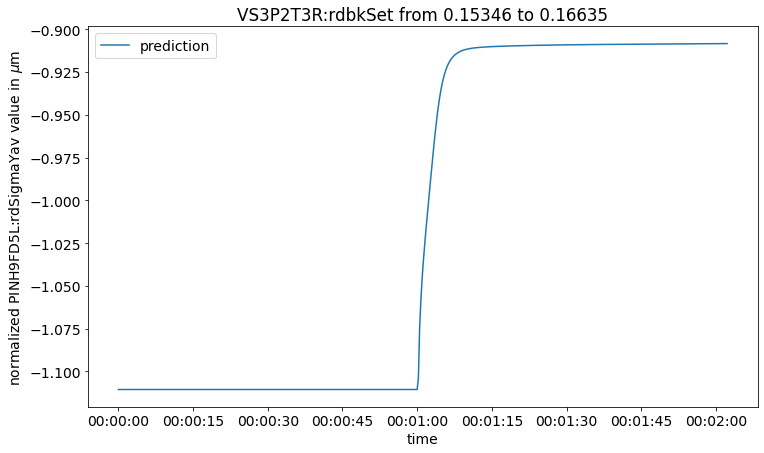

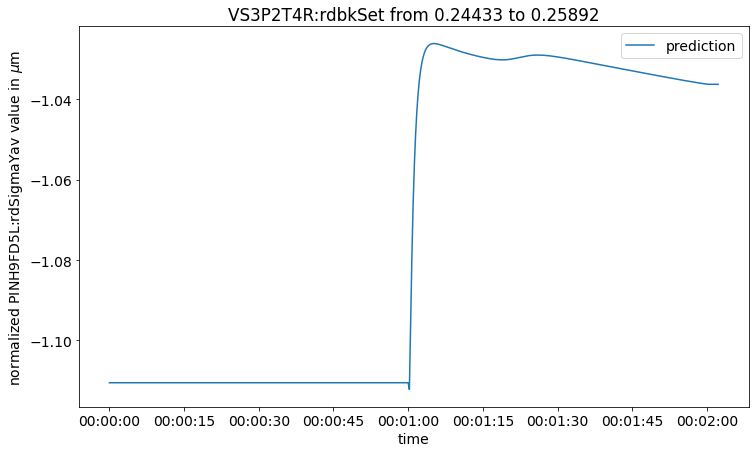

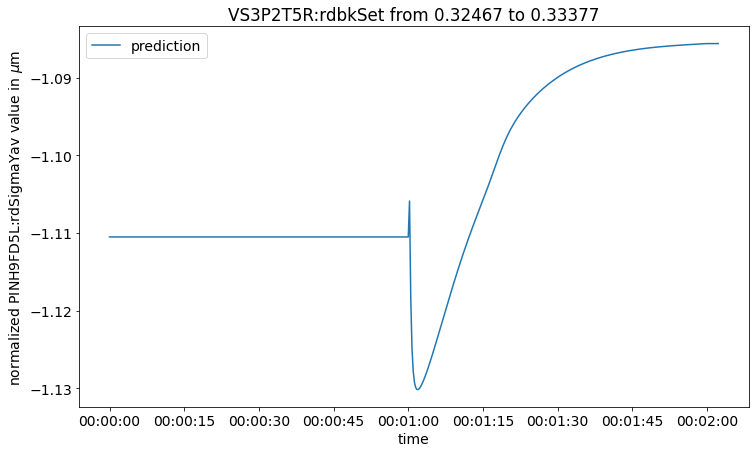

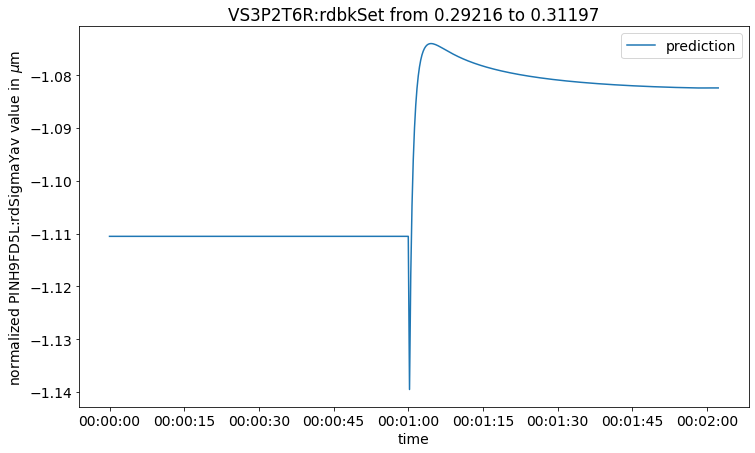

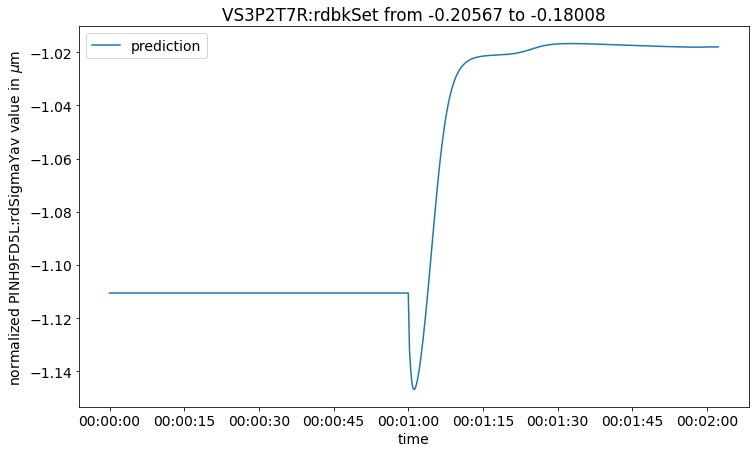

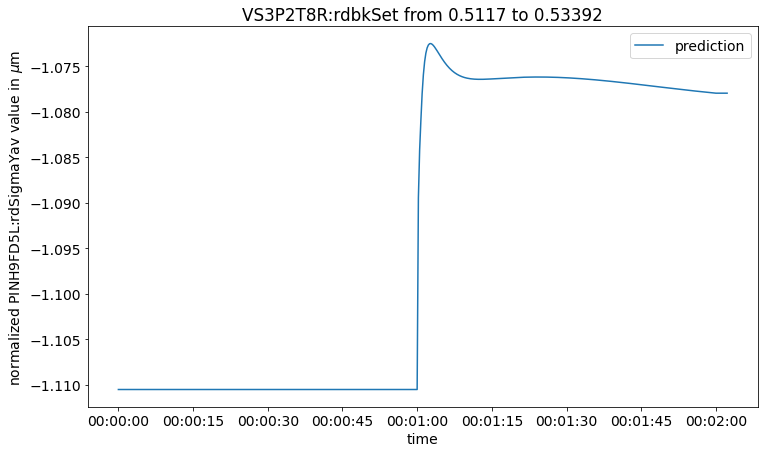

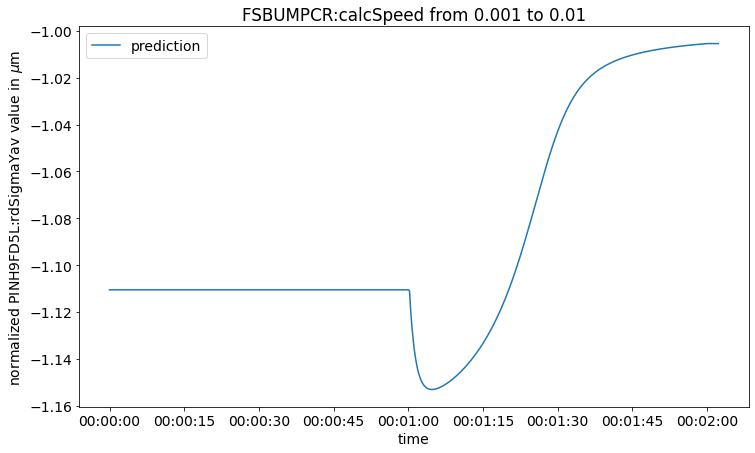

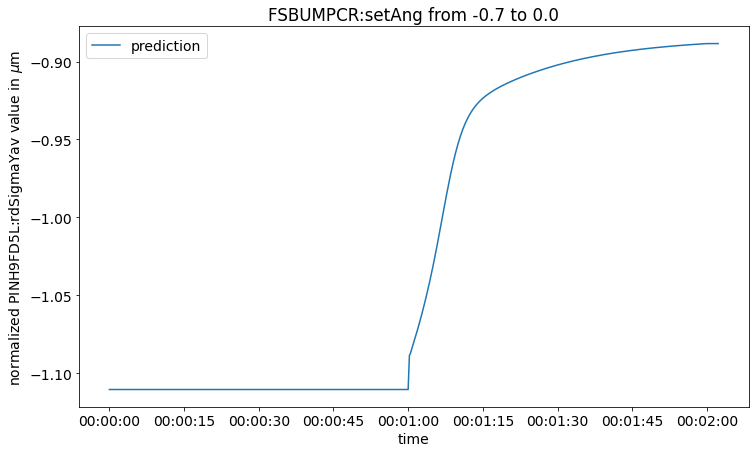

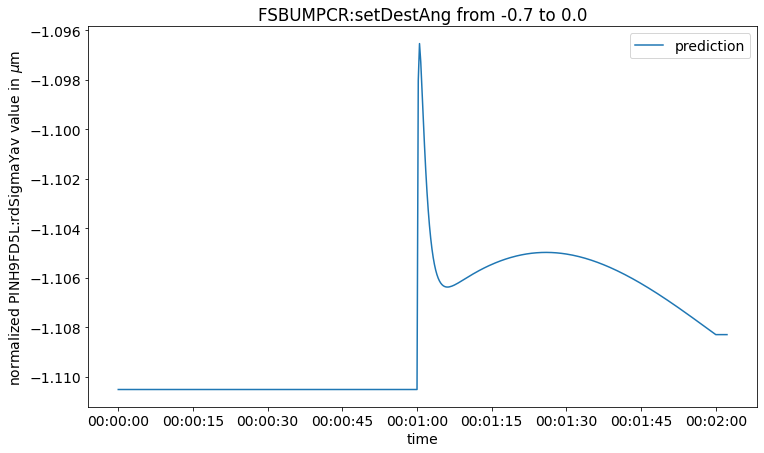

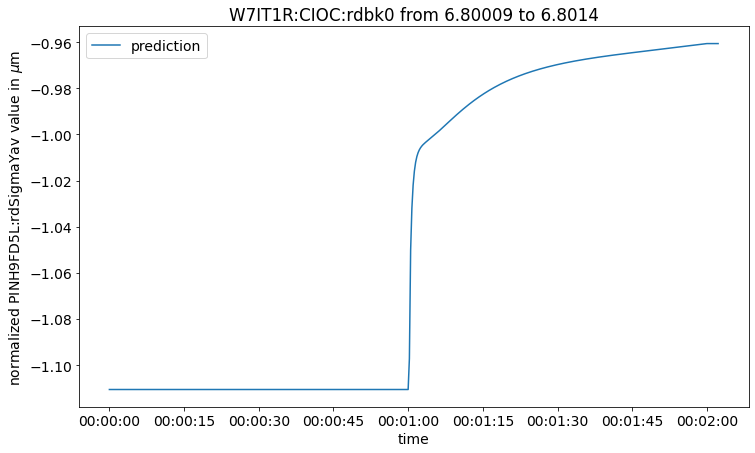

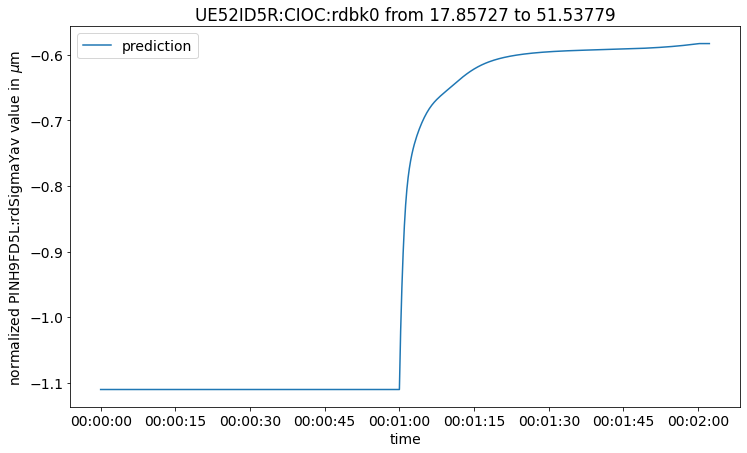

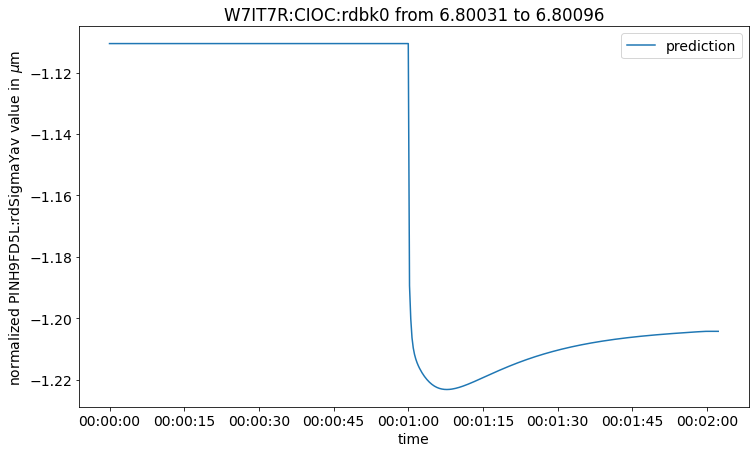

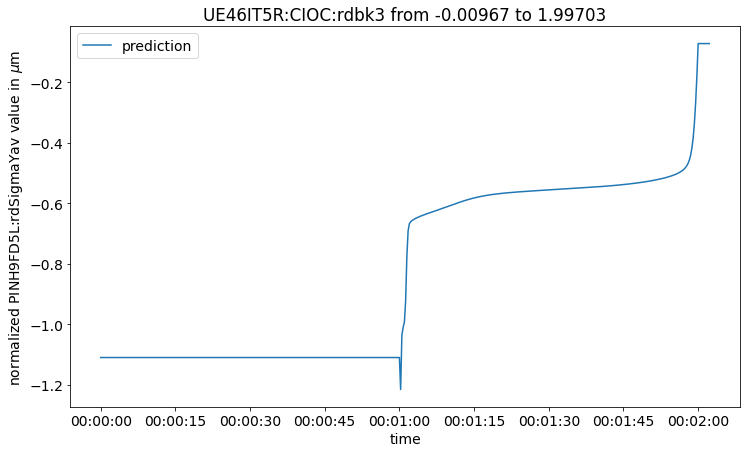

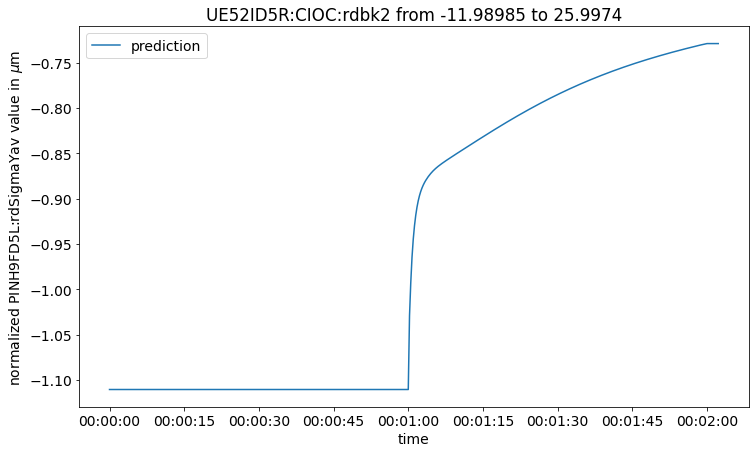

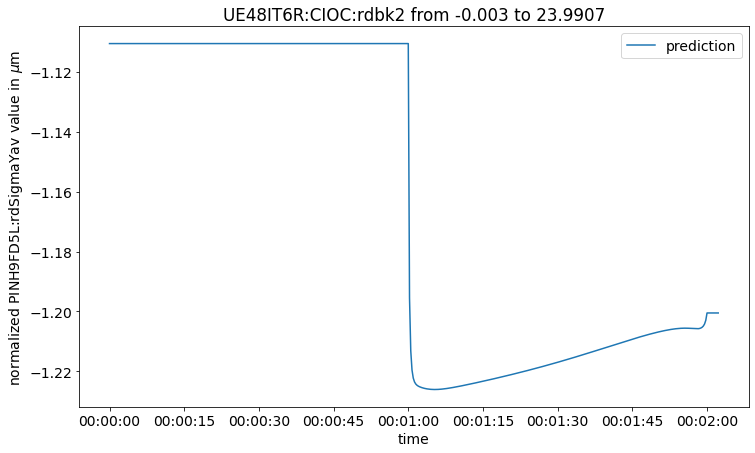

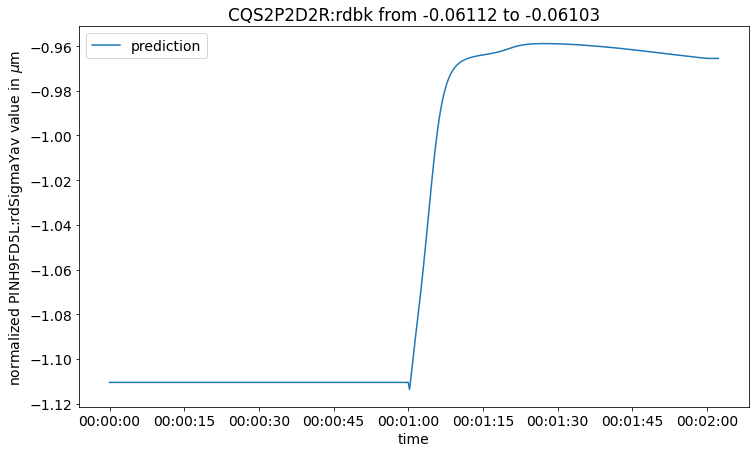

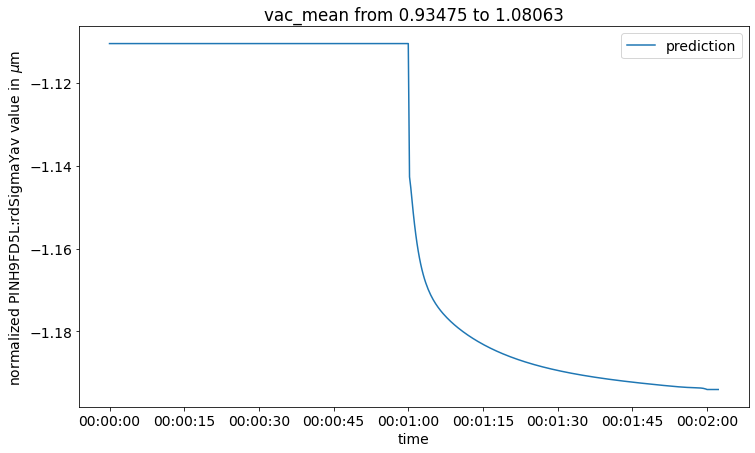

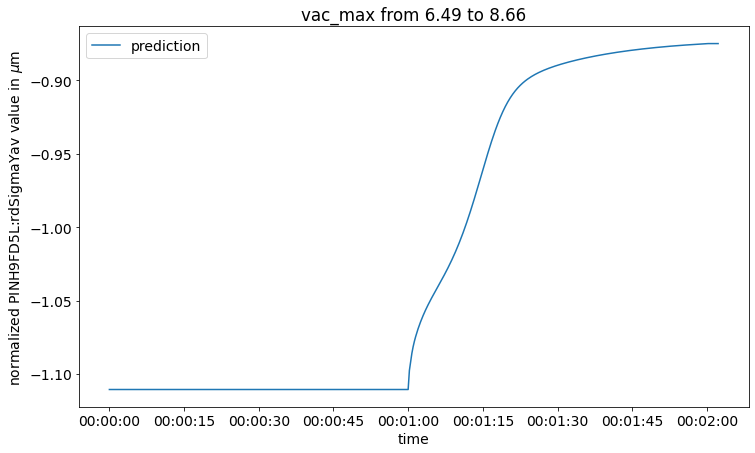

In [23]:
maxs_df=df.max(axis=0) #same as min_list and max_list, just as pandas dataframe
mins_df=df.min(axis=0)

for x in columns:         #go through all parameters
    if maxs_df[x]!=mins_df[x]:
        plt.figure(figsize=(12,7))

        x_df_temp=x_df.copy()
        x_df_temp[x][480:]=maxs_df[x]           #set after 2minutes to the maximum value

        x_df_temp=(x_df_temp-mean[2:])/sigma[2:]      #normalize dataset

        lstm_x = create_sequence(x_df_temp, 240)
        y_pred = ((model.predict(lstm_x).T).astype(float)).tolist()[0]      #make prediction



        plt.plot(time_index_list[240:],y_pred,label="prediction")
        plt.legend()
        plt.ylabel("normalized PINH9FD5L:rdSigmaYav value in $\mu$m")
        plt.xlabel("time")
        plt.title(f"{x} from {round(mins_df[x],5)} to {round(maxs_df[x],5)}")
